## PGP-AIML UT-Austin Online - August 21 B(Group-10_NLP-1)##

# **Milestone 1: Pre-Processing, Data Visualisation and EDA**

# **Automatic Ticketing - Capstone Project**
# **Problem Statement -**
One of the key activities of any IT function is to ensure there is no impact to the Business operations. IT leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact.

In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources.

Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

# **Business Domain Value:**
In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings.

Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure.

L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams. During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service.

This major project aims to reduce the manual intervention of IT operations or Service Desk teams by automating the ticket allocation process. The goal is to create a text-based ML model that can automatically classify any new tickets by analyzing the ticket description into one of the appropriate assignment group, which can later be integrated into any ITSM tool like Service Now. Based on the description of the ticket, our model outputs the probability of assigning it to one of 74 groups.


# **Objective:**
Build Multi-Class classifier that can classify the tickets by analysing text.
Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

Milestones


# **Milestone 1: Pre-Processing, Data Visualisation and EDA**

Exploring the given Data files
Understanding the structure of data
Missing points in data
Finding inconsistencies in the data
Visualizing different patterns
Visualizing different text features
Dealing with missing values
Text preprocessing
Creating word vocabulary from the corpus of report text data
Creating tokens as required


# **Milestone 2: Model Building**

Building a model architecture which can classify.
Trying different model architectures by researching state of the art for similar tasks.
Train the model
To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.



# **Milestone 3: Test the Model, Fine-tuning and Repeat**

Test the model and report as per evaluation metrics
Try different models
Try different evaluation metrics
Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them
Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.

The solution would be implemented using the approach below:

#**Approach 1**#
– Using a traditional machine learning algorithm, we would classify the tickets into one of the groups of over 100 tickets.

#**Approach 2**#
- The ticket would first be assigned to the L1/L2 or L3 classes and then further assigned to one of the given assignment groups.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### A quick look at our data and review

#### Read the data using pandas read_excel

In [ ]:
! pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/ColabNotebooks/PGP_AIML_Data/Capstone project/Group_10 - NLP1 Project Common WorkSpace/Input+Data+Synthetic+_28created+but+not+used+in+our+project_29.xlsx")

#Display the data head
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


#### Data Shape

In [ ]:
df.shape

(8500, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


### Observation:

- There are 4 columns and all are string columns
- There are a total of 8500 rows and the Short Description and Description columns seem to be missing values ​​that need to be examined and processed
- The caller columns mainly contain details about the user who initiated the incident and are not very useful for our analysis and can be discarded.
- The assignment group is our predictor / target column with multiple classes.
- This is a problem of multi-class classification 

### We omit the Caller column because it does not seem to contribute to predicting the target

In [ ]:
df_incidents = df.drop('Caller',axis=1)
df_incidents.head(5)

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0


### Let's look at the number of classes in the Task group

In [ ]:
df_incidents['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [ ]:
len(df_incidents['Assignment group'].unique())

74

In [ ]:
df_inc = df_incidents['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


## From the above data we can deduce the below inferences

## Keep the below cell executed for once, if you wish to repeat executing these two cells, we need to execute again the cell above that contains "Omitting Caller column from dataframe"


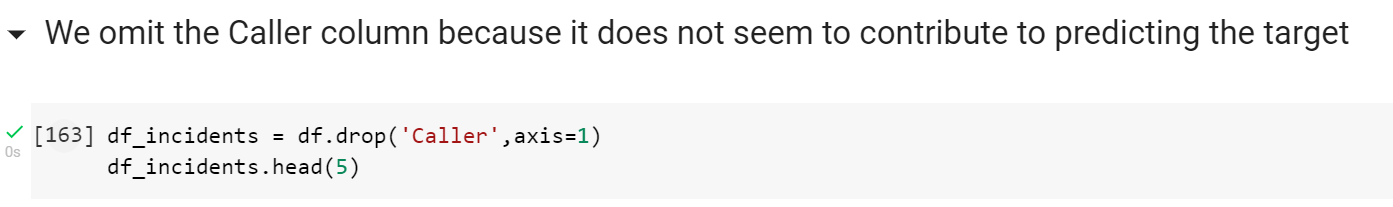

In [ ]:
sample = df_incidents.groupby(['Assignment group'])
regroup=[]
for grp in df_incidents['Assignment group'].unique():
  if(sample.get_group(grp).shape[0]<10):
    regroup.append(grp)
print('Found {} groups which have under 10 samples'.format(len(regroup)))
#print("\n\nGroups with less than 10 samples\n\n",len(regroup))
df_incidents['Assignment group']=df_incidents['Assignment group'].apply(lambda x : 'misc_grp' if x in regroup  else x)

# Unique Groups check 
print("\n\nUnique Groups\n\n",df_incidents['Assignment group'].unique())
# Groups with less than 10 samples
print("\n\nGroups with less than 10 samples\n\n", len(regroup))

Found 25 groups which have under 10 samples


Unique Groups

 ['GRP_0' 'GRP_1' 'GRP_3' 'GRP_4' 'GRP_5' 'GRP_6' 'GRP_7' 'GRP_8' 'GRP_9'
 'GRP_10' 'GRP_11' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_15' 'GRP_16' 'GRP_17'
 'GRP_18' 'GRP_19' 'GRP_2' 'GRP_20' 'GRP_21' 'GRP_22' 'GRP_23' 'GRP_24'
 'GRP_25' 'GRP_26' 'GRP_27' 'GRP_28' 'GRP_29' 'GRP_30' 'GRP_31' 'GRP_33'
 'GRP_34' 'misc_grp' 'GRP_36' 'GRP_37' 'GRP_39' 'GRP_40' 'GRP_41' 'GRP_42'
 'GRP_44' 'GRP_45' 'GRP_47' 'GRP_48' 'GRP_50' 'GRP_53' 'GRP_60' 'GRP_62'
 'GRP_65']


Groups with less than 10 samples

 25


## The above 25 groups with less than 10 samples can be visualized better in a later section

### Allows you to visualize the percentage of incidents per assignment group

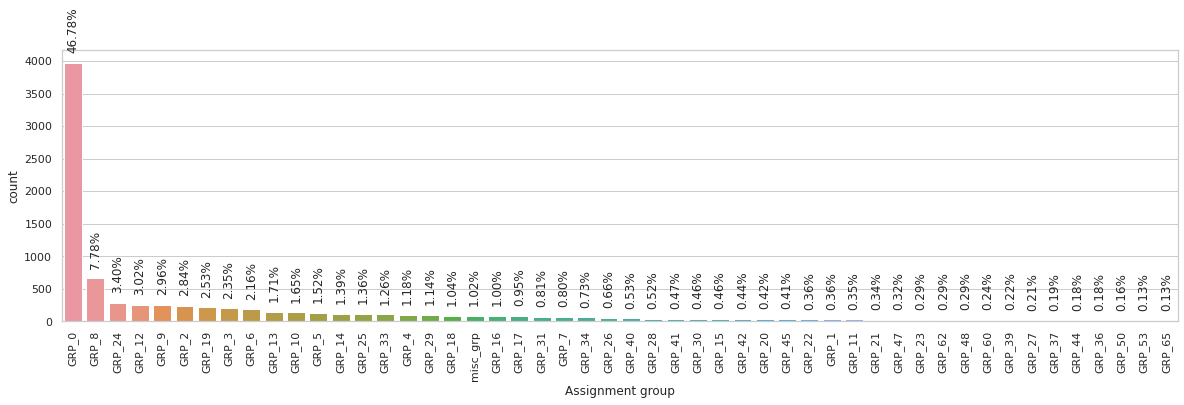

In [ ]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df_incidents, order=df_incidents["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df_incidents.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

### Observation
- This is an unbalanced dataset, with most incidents coming from Group 0, followed by Group 8, 24, 12, 9, 2, and so on
- There are several classes that have less than 10 incidents per class and are even classified with only 1 or 2 incidents, we need to see if we can drop those rows due to the lack of samples representing those classes. It may not help much as a predictor

### Lets view the top 20 Assignment groups with highest number of tickets

In [ ]:
df_top_20 = df_incidents['Assignment group'].value_counts().nlargest(20).reset_index()
df_top_20

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


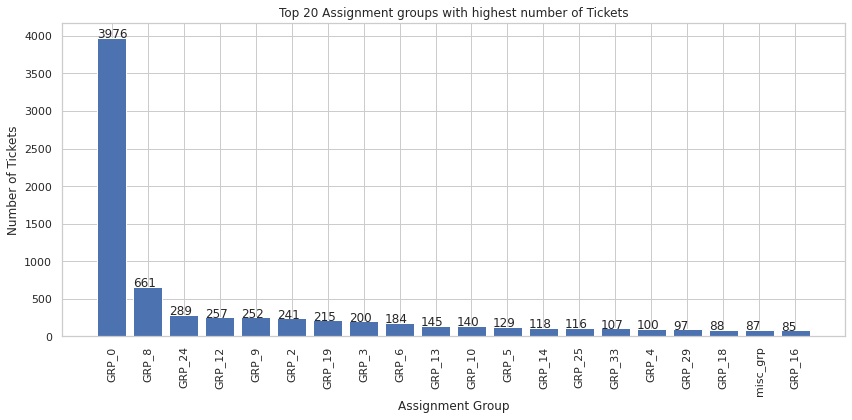

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

### Lets view the bottom 20 Assignment groups with less number of tickets

In [ ]:
df_bottom_20 = df_incidents['Assignment group'].value_counts().nsmallest(20).reset_index()
df_bottom_20

,index,Assignment group
0,GRP_53,11
1,GRP_65,11
2,GRP_50,14
3,GRP_44,15
4,GRP_36,15
5,GRP_37,16
6,GRP_27,18
7,GRP_39,19
8,GRP_60,20
9,GRP_23,25


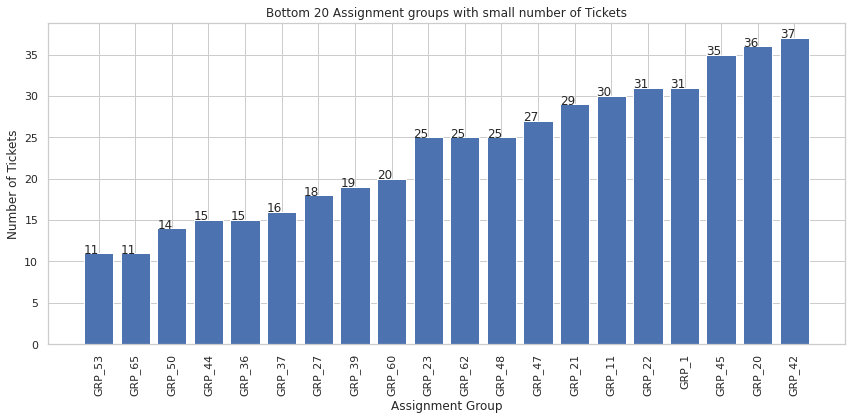

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_20['index'],df_bottom_20['Assignment group'])
plt.title('Bottom 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

#### -- The Assigment group consists of 74 different classes

### Distribution of tickets counts in various bins

In [ ]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

,Description,Ticket Count
0,1 ticket,6
1,2-5 ticket,13
2,6-10 ticket,6
3,11-20 ticket,9
4,21-50 ticket,16
5,51-100 ticket,9
6,>100 ticket,15


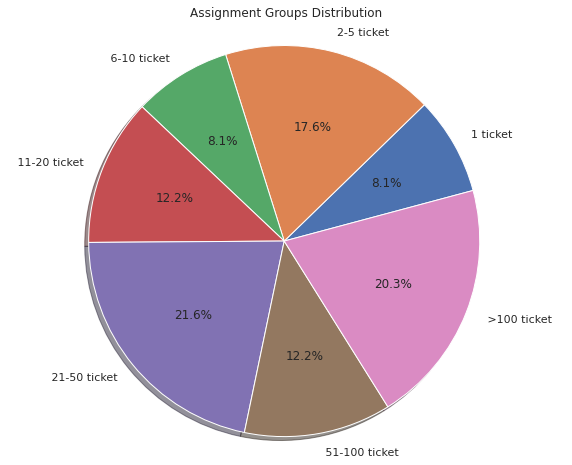

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

-You can see that the dataset has 6 allocation groups with only one ticket

-100 There are 15 quota groups with more than 100 tickets.

-Only 20% of the assigned groups have more than 100 tickets.

### Missing Values

There are missing values in the dataset, within 'Short decription' and 'Description' columns, lets view the missing values and impute them.

In [ ]:
df_incidents[df_incidents['Short description'].isnull()]

,Short description,Description,Assignment group
2604,NaN,_x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...,GRP_34
3383,NaN,_x000D_\n-connected to the user system using t...,GRP_0
3906,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3910,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3915,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3921,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,GRP_0
4341,NaN,_x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...,GRP_0


In [ ]:
df_incidents[df_incidents['Description'].isnull()]

,Short description,Description,Assignment group
4395,i am locked out of skype,NaN,GRP_0


Replace the -nan value with '' (empty string)

Next, connect Short Description and Description to form a column called "New_Description" and use it as a prediction. 

Don't miss the information you need about your ticket.

In [ ]:
#Replace NaN values in Short Description and Description columns
df_incidents['Short description'] = df_incidents['Short description'].replace(np.nan, '', regex=True)
df_incidents['Description'] = df_incidents['Description'].replace(np.nan, '', regex=True)

In [ ]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8500 non-null   object
 1   Description        8500 non-null   object
 2   Assignment group   8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


In [ ]:
#Concatenate Short Description and Description columns
df_incidents['New_Description'] = df_incidents['Short description'] + ' ' +df_incidents['Description']

In [ ]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,skype error skype error


In [ ]:
df_incidents.isnull().sum()

Short description    0
Description          0
Assignment group     0
New_Description      0
dtype: int64

## Derive insights on ticket distribution by L1/L2 and L3

In [ ]:
df_incidents_level = df_incidents.copy()
df_incidents_level['Target'] = np.where(df_incidents_level['Assignment group']=='GRP_0','L1/L2',np.where(df_incidents_level['Assignment group'] =='GRP_8','L1/L2','L3'))

In [ ]:
df_incidents.head(5)

,Short description,Description,Assignment group,New_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,skype error skype error


In [ ]:
df_incidents_level.head(5)

,Short description,Description,Assignment group,New_Description,Target
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,L1/L2
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,L1/L2
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,L1/L2
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...,L1/L2
4,skype error,skype error,GRP_0,skype error skype error,L1/L2


In [ ]:
df_incidents_level.Target.value_counts()

L1/L2    4637
L3       3863
Name: Target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

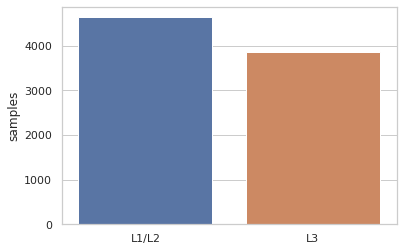

In [ ]:
x=df_incidents_level.Target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

### Characters in Short description by L1/L2 and L3

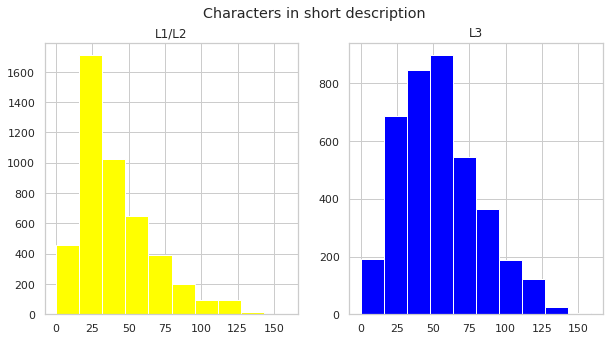

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Short description'].str.len()
ax1.hist(text_len.dropna(),color='yellow')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['Short description'].str.len()
ax2.hist(text_len.dropna(),color='blue')
ax2.set_title('L3')
fig.suptitle('Characters in short description')
plt.show()

### Words in Short description by L1/L2 and L3

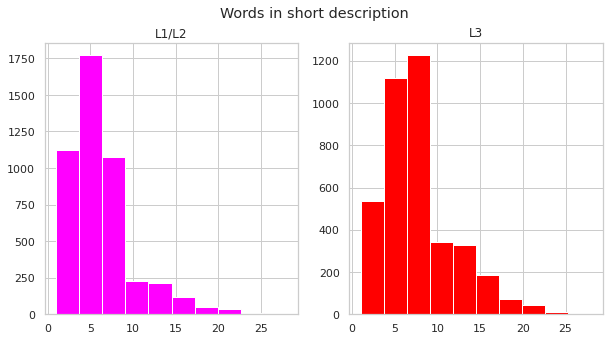

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax1.hist(text_len.dropna(),color='magenta')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax2.hist(text_len.dropna(),color='red')
ax2.set_title('L3')
fig.suptitle('Words in short description')
plt.show()

In [ ]:
df_incidents_level['Short description']=df_incidents_level['Short description'].apply(str)

def ave_word_len(sentence):
    words  = sentence.split(" ")
    return ((sum((len(word) for word in words))/len(words)))

df_incidents_level["short_description_avg_word_len"] = df_incidents_level["Short description"].apply(ave_word_len)


### Average word length in Short description(text-group of words) by L1/L2 and L3

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py

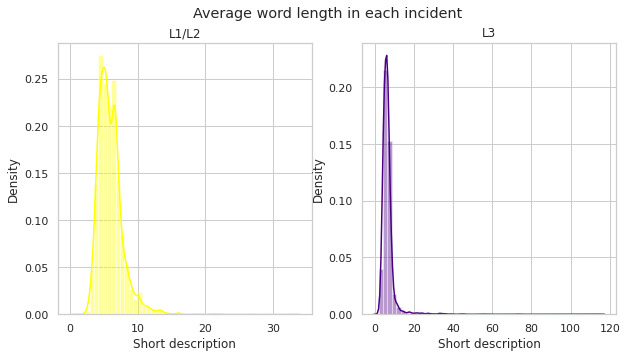

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word1=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Short description'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word1.map(lambda x: np.mean(x)),ax=ax1,color='yellow')
ax1.set_title('L1/L2')
#print("\n\n",word,"\n\n")
word2=df_incidents_level[df_incidents_level['Target']=='L3']['Short description'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word2.map(lambda x: np.mean(x)),ax=ax2,color='indigo')
ax2.set_title('L3')
fig.suptitle('Average word length in each incident');
#print("\n\n",word.size,"\n\n")

### Number of upper case in Short description by L1/L2 and L3

In [ ]:
df_incidents_level["short_description_nupper1"] = df_incidents_level[df_incidents_level['Target']=='L1/L2']["Short description"].apply((lambda word1: len([x for x in word1.split() if x.isupper()])))
df_incidents_level["short_description_nupper2"] = df_incidents_level[df_incidents_level['Target']=='L3']["Short description"].apply((lambda word2: len([x for x in word2.split() if x.isupper()])))
print("Nulls for L1/L2",df_incidents_level["short_description_nupper1"].isna().sum(),"\n")
print("Nulls for L3",df_incidents_level["short_description_nupper2"].isna().sum(),"\n")
df_incidents_level["short_description_nupper1"] = df_incidents_level["short_description_nupper1"].fillna(0)
df_incidents_level["short_description_nupper2"] = df_incidents_level["short_description_nupper2"].fillna(0)
print("Nulls for L1/L2 after removing nulls",df_incidents_level["short_description_nupper1"].isna().sum(),"\n")
print("Nulls for L3 after removing nulls",df_incidents_level["short_description_nupper2"].isna().sum(),"\n")
df_incidents_level["short_description_nupper"] = df_incidents_level["short_description_nupper1"] + df_incidents_level["short_description_nupper2"]
print("size of the column with both L1/L2 and L3 tickets",df_incidents_level["short_description_nupper"].size)

Nulls for L1/L2 3863 

Nulls for L3 4637 

Nulls for L1/L2 after removing nulls 0 

Nulls for L3 after removing nulls 0 

size of the column with both L1/L2 and L3 tickets 8500


In [ ]:
df_incidents_level["short_description_nupper"].size

8500

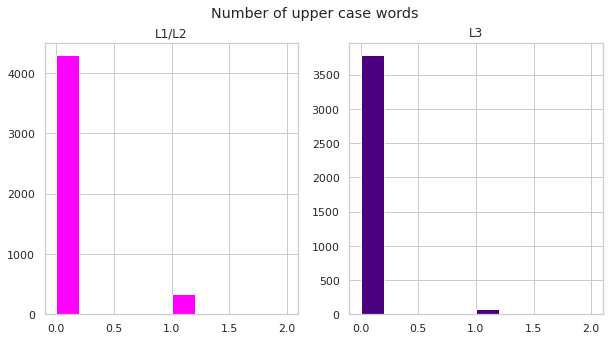

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['short_description_nupper']
ax1.hist(text_len.dropna(),color='magenta')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['short_description_nupper']
ax2.hist(text_len.dropna(),color='indigo')
ax2.set_title('L3')
fig.suptitle('Number of upper case words')
plt.show()

### Number of digits in Short description by L1/L2 and L3

In [ ]:
df_incidents_level["short_description_ndigits"] = df_incidents_level["Short description"].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df_incidents_level[["Short description","short_description_ndigits"]].sort_values(by = "short_description_ndigits",ascending = False).head()

,Short description,short_description_ndigits
5469,sto 5019179518 is for 2 pcs of material 631688...,4
2867,prdord 226040587 226040835 226040589 2...,4
6287,i am stuck. has 3 lines. lines 40 and 50...,4
145,unable to start dell 7350 2 in 1 device,3
3235,no audio in dell 7350 2 in 1 tablet,3


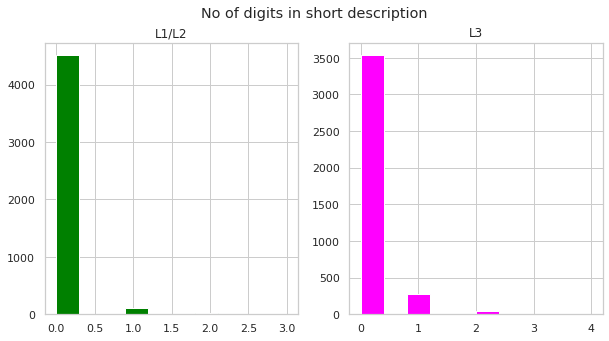

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['short_description_ndigits']
ax1.hist(text_len.dropna(),color='green')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['short_description_ndigits']
ax2.hist(text_len.dropna(),color='magenta')
ax2.set_title('L3')
fig.suptitle('No of digits in short description')
plt.show()

### Seems like there are few tickets with description in some other language, probably in German

In [ ]:
df_incidents_level[df_incidents_level['Assignment group']=='GRP_24'].New_Description

222     support fÃ¼r fa.gstry \arexjftu ohxdwngl suppo...
223     probleme mit bluescreen . hallo ,\n\nes ist er...
255     probleme mit laufwerk z: \laeusvjo fvaihgpx pr...
302     EU_tool ist sehr langsadgtym \ywqgrbnx jwnsyzb...
304     alte eq abholen \wrcktgbd wzrgyunp alte eq abh...
305     probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzr...
306     support fÃ¼r we111\zlqfptjx xnklbfua support f...
349     install EU_tool \laeusvjo fvaihgpx install EU_...
441     probleme mit portal \knlrgsiv cqvuexjz problem...
446     setup rechner ewel8323865 fÃ¼r hr.thrydad (thr...
453     probleme mit erpgui \tmqfjard qzhgdoua problem...
454     support fÃ¼r fa.thrydsss-funke \laeusvjo fvaih...
455     bildband  tauschen \drucker we68678 \vepxdgot ...
555     probleme mit fixiereinheit we101 \qvncizuf uei...
586     probleme mit bluescreen  hallo ,\n\ngerade ebe...
589     probleme mit lan fÃ¼r rechner erodiermaschine\...
744     drucker in lÃ¶we uacyltoe hxgayczeraum knicrht...
748     reinst

### Lets analyse this further

In [ ]:
df_incidents_level.head()

,Short description,Description,Assignment group,New_Description,Target,short_description_avg_word_len,short_description_nupper1,short_description_nupper2,short_description_nupper,short_description_ndigits
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,L1/L2,5.000000,0.0,0.0,0.0,0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,L1/L2,7.000000,0.0,0.0,0.0,0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,L1/L2,2.800000,0.0,0.0,0.0,0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...,L1/L2,5.000000,0.0,0.0,0.0,0
4,skype error,skype error,GRP_0,skype error skype error,L1/L2,3.333333,0.0,0.0,0.0,0


In [ ]:
#Lets encode the string, to make it easier to be passed to language detection api.
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8") 

df_incidents_level['New_Description'] = df_incidents_level['New_Description'].apply(fn_decode_to_ascii)

### Detect the language the ticket is raised by

In [ ]:
! pip install langdetect
from langdetect import detect
    
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'                                                  

df_incidents_level['language'] = df_incidents_level['New_Description'].apply(fn_lan_detect)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_incidents_level["language"].value_counts()

en    7140
de     382
af     266
it     127
fr     104
no     103
nl      66
sv      49
ca      48
es      47
pl      29
da      27
pt      19
tl      12
sl      12
ro      11
cy      11
sq      10
hr       7
et       6
id       5
so       5
fi       4
cs       3
lv       2
sk       2
lt       2
vi       1
Name: language, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


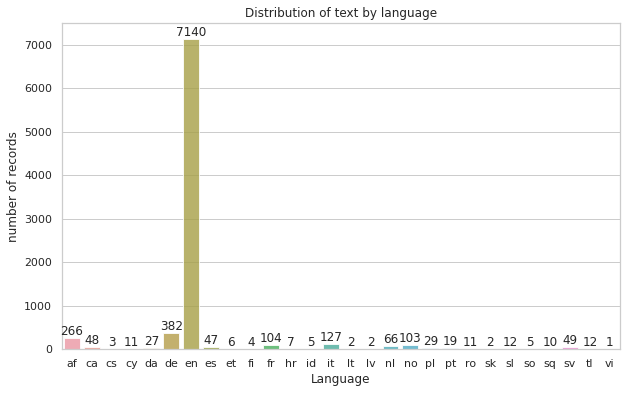

In [ ]:
x = df_incidents_level["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

- We can see that most of the tickets are in english, followed by tickets in German language. We need to translate these into english.
- We will be using google translate package to translate

In [ ]:
!pip install googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

### Translate the text to English

In [ ]:
# Function to translate the text to english.
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    
    
df_incidents_level['English_Description'] = df_incidents_level.apply(lambda x: fn_translate(x['New_Description'], x['language']), axis=1)

Note: Google Translate API is used for translating the german text, however there is limit imposed from Google on the number of requests from a particular ip address. So the traslation was done in batches and save to a file. Which will be used for further processing

#### We mainly see that GRP_0 contains incidents related to account lockout, lets see if other groups also have incidents related to account lockout

In [ ]:
df_incidents_level[df_incidents_level["Short description"].str.contains("account lock")]["Assignment group"].value_counts()

GRP_0       226
GRP_2         3
GRP_34        1
misc_grp      1
Name: Assignment group, dtype: int64

In [ ]:
df_incidents_level[df_incidents_level["Short description"].str.contains("oneteam")]["Assignment group"].value_counts()

GRP_0       3
misc_grp    1
Name: Assignment group, dtype: int64

In [ ]:
df_incidents_level.head(5)

,Short description,Description,Assignment group,New_Description,Target,short_description_avg_word_len,short_description_nupper1,short_description_nupper2,short_description_nupper,short_description_ndigits,language,English_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,L1/L2,5.000000,0.0,0.0,0.0,0,en,login issue -verified user details.(employee# ...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,L1/L2,7.000000,0.0,0.0,0.0,0,en,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,L1/L2,2.800000,0.0,0.0,0.0,0,en,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...,L1/L2,5.000000,0.0,0.0,0.0,0,en,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,skype error skype error,L1/L2,3.333333,0.0,0.0,0.0,0,no,skype error skype error


In [ ]:
df_incidents_level.to_csv('/content/drive/MyDrive/ColabNotebooks/PGP_AIML_Data/Capstone project/Group_10 - NLP1 Project Common WorkSpace/inc_tranlated.csv')

## Data Cleaning
Before we start with any NLP project we need to pre-process the data to get it all in a consistent format.We need to clean, tokenize and convert our data into a matrix. 

In [ ]:
df_tranlated_text = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/PGP_AIML_Data/Capstone project/Group_10 - NLP1 Project Common WorkSpace/inc_tranlated.csv',encoding='utf-8')
df_tranlated_inc = df_tranlated_text.drop(['Short description','Description','New_Description'],axis=1)
df_tranlated_inc.English_Description=df_tranlated_inc.English_Description.astype(str)
df_tranlated_inc.head()

,Unnamed: 0,Assignment group,Target,short_description_avg_word_len,short_description_nupper1,short_description_nupper2,short_description_nupper,short_description_ndigits,language,English_Description
0,0,GRP_0,L1/L2,5.000000,0.0,0.0,0.0,0,en,login issue -verified user details.(employee# ...
1,1,GRP_0,L1/L2,7.000000,0.0,0.0,0.0,0,en,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,2,GRP_0,L1/L2,2.800000,0.0,0.0,0.0,0,en,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,3,GRP_0,L1/L2,5.000000,0.0,0.0,0.0,0,en,unable to access hr_tool page unable to access...
4,4,GRP_0,L1/L2,3.333333,0.0,0.0,0.0,0,no,skype error skype error


In [ ]:
df_tranlated_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      8500 non-null   int64  
 1   Assignment group                8500 non-null   object 
 2   Target                          8500 non-null   object 
 3   short_description_avg_word_len  8500 non-null   float64
 4   short_description_nupper1       8500 non-null   float64
 5   short_description_nupper2       8500 non-null   float64
 6   short_description_nupper        8500 non-null   float64
 7   short_description_ndigits       8500 non-null   int64  
 8   language                        8500 non-null   object 
 9   English_Description             8500 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 664.2+ KB


In [ ]:
import string
import re
from collections import Counter
from nltk.corpus import stopwords

In [ ]:
### Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    text=text.replace('regards', '')

    text = re.sub(r'\S+@\S+', '', text)
    custom_punctuation='!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\r\n', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub("\d+", "", text)
    text = text.lower()
    return text


In [ ]:
df_tranlated_inc['cleaned_description'] = df_tranlated_inc['English_Description'].apply(lambda x: clean_text(x))
df_tranlated_inc.drop(['English_Description'],axis=1,inplace=True)

In [ ]:
df_tranlated_inc['cleaned_description'].head()

0    login issue verified user detailsemployee  man...
1    outlook   teammy meetingsskype meetings etc ar...
2             cant log in to vpn  i cannot log on to  
3    unable to access hrtool page unable to access ...
4                            skype error  skype error 
Name: cleaned_description, dtype: object

## Use the word cloud to visualize the type of words used in the description

For all types of natural language processing, one of the most useful visualization tools for data scientists is the "Word Cloud" scheme. A word cloud (as its name suggests) is an image of a combination of individual words that can form a text or book, and the size of each word is proportional to the frequency (number of repetitions) of the words of that text. increase. ... word is displayed). Here our words can be easily taken from the "text" column

In [ ]:
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

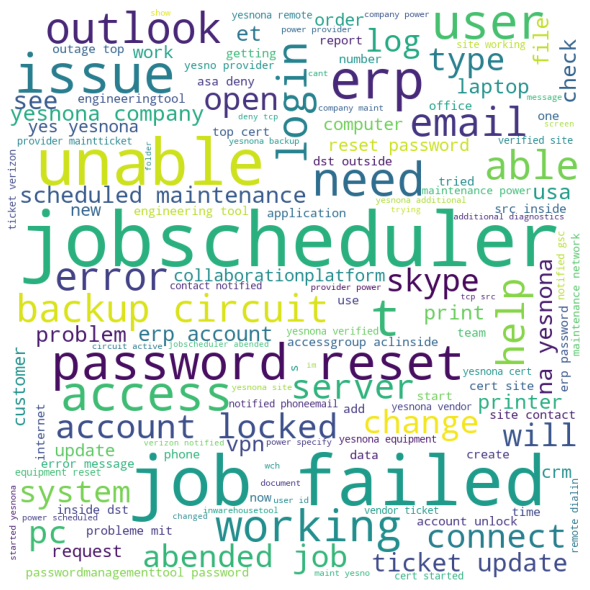

In [ ]:
from wordcloud import WordCloud, STOPWORDS 


wordcloud = f_word_cloud(df_tranlated_inc.cleaned_description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## View the word clouds of the top four groups to see the types of tickets assigned to them

### WordCloud for "GRP_0" allocation group tickets

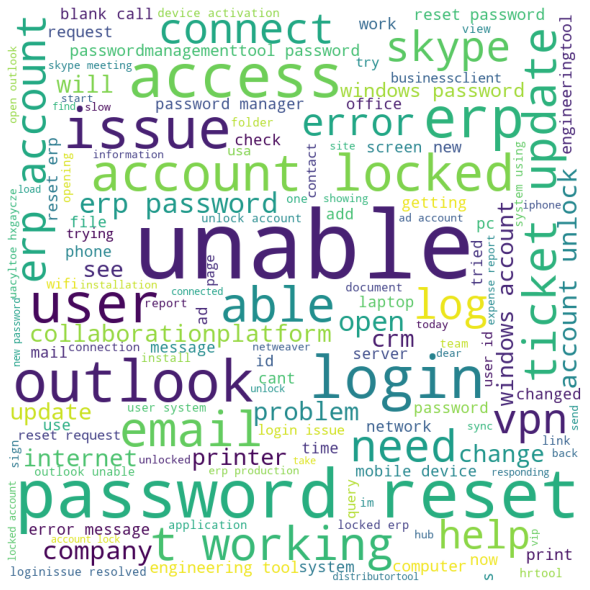

In [ ]:
wordcloud = f_word_cloud(df_tranlated_inc[df_tranlated_inc['Assignment group']=='GRP_0'].cleaned_description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

GRP_0 seems to have tickets related to password resets, access problems, login problems, connection problems, etc.

### WordCloud for tickets for assignment group "GRP_8"

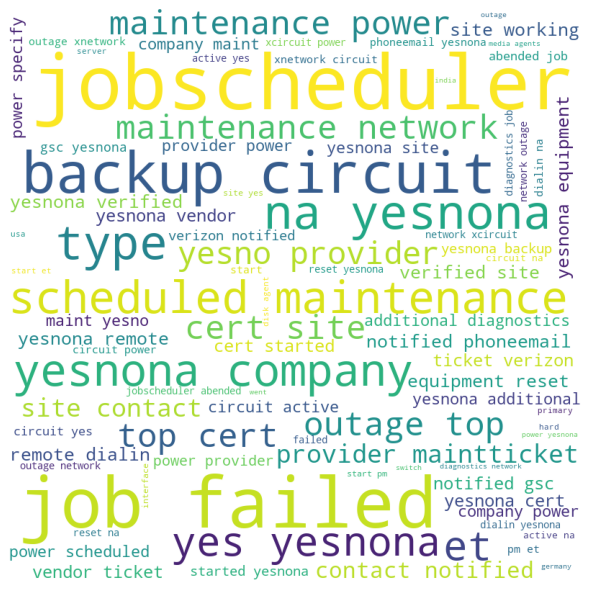

In [ ]:
wordcloud = f_word_cloud(df_tranlated_inc[df_tranlated_inc['Assignment group']=='GRP_8'].cleaned_description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

GRP_8 seems to have tickets related to outage, job failures, monitoring tool etc

### Word Cloud for tickets with Assignment group 'GRP_12'

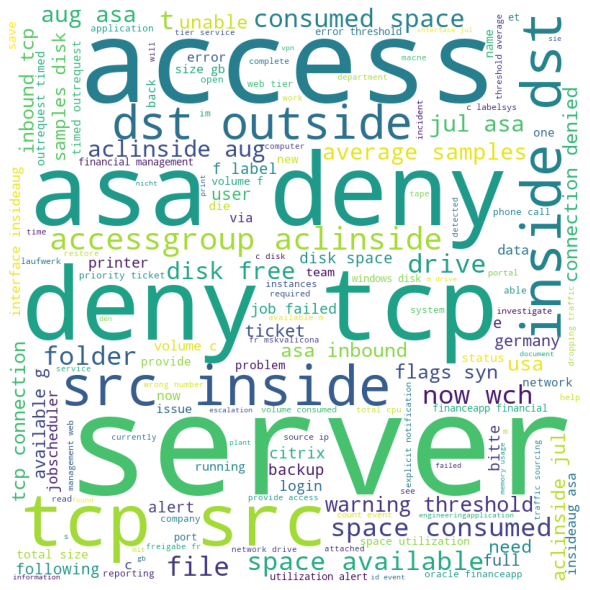

In [ ]:
wordcloud = f_word_cloud(df_tranlated_inc[df_tranlated_inc['Assignment group']=='GRP_12'].cleaned_description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

GRP_12 contains tickets related to systems like  disk space issues, t network issues like tie out, citrix issue, connectivity timeout etc.

### Word Cloud for tickets with Assignment group 'GRP_24'

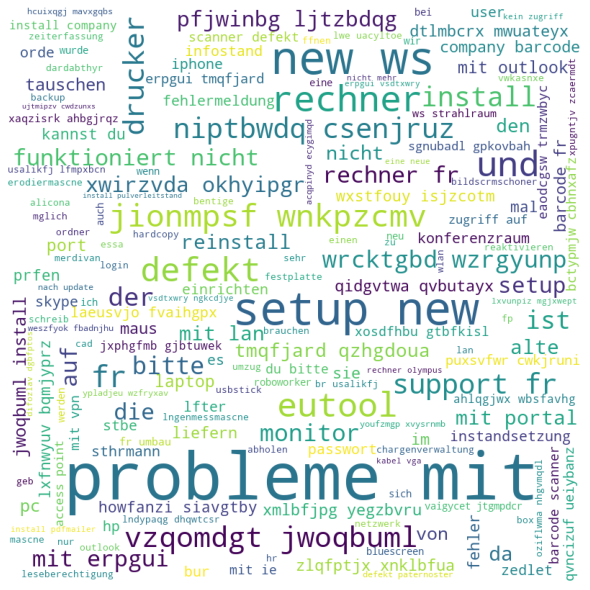

In [ ]:
wordcloud = f_word_cloud(df_tranlated_inc[df_tranlated_inc['Assignment group']=='GRP_24'].cleaned_description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

GRP_24 - Tickets are mainly in german, these tickets need to be translated to english before passing it to our model.

### Removal of Stop Words
Now, let's get rid of the stopwords i.e words which occur very frequently but have no possible value like a, an, the, are etc.

In [ ]:
## Removal of Stop Words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_tranlated_inc['cleaned_description'] = df_tranlated_inc['cleaned_description'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df_tranlated_inc['cleaned_description'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    login issue verified user detailsemployee mana...
1    outlook teammy meetingsskype meetings etc appe...
2                              cant log vpn cannot log
3    unable access hrtool page unable access hrtool...
4                              skype error skype error
Name: cleaned_description, dtype: object

### Lemmatization

In [ ]:
## Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from textblob import Word
df_tranlated_inc['cleaned_description']= df_tranlated_inc['cleaned_description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
df_tranlated_inc['cleaned_description'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    login issue verified user detailsemployee mana...
1    outlook teammy meetingsskype meeting etc appea...
2                              cant log vpn cannot log
3    unable access hrtool page unable access hrtool...
4                              skype error skype error
Name: cleaned_description, dtype: object

### take a look at the average (mean) number of words in each ticket, and the longest and shortest description in our data set

In [ ]:
df_tranlated_inc['num_wds'] = df_tranlated_inc['cleaned_description'].apply(lambda x: len(x.split()))
df_tranlated_inc['num_wds'].mean()

17.204941176470587

In [ ]:
print(df_tranlated_inc['num_wds'].max())
print(df_tranlated_inc['num_wds'].min())

620
0


In [ ]:
len(df_tranlated_inc[df_tranlated_inc['num_wds']==0])

47

### Consider tickets with words greater than 1

In [ ]:
df_tranlated_inc= df_tranlated_inc[df_tranlated_inc['num_wds']>1]

In [ ]:
print(df_tranlated_inc['num_wds'].max())
print(df_tranlated_inc['num_wds'].min())

620
2


### Average Word Length

In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))


df_tranlated_inc['avg_word'] = df_tranlated_inc['cleaned_description'].apply(lambda x: avg_word(str(x)))
df_tranlated_inc.head()

,Unnamed: 0,Assignment group,Target,short_description_avg_word_len,short_description_nupper1,short_description_nupper2,short_description_nupper,short_description_ndigits,language,cleaned_description,num_wds,avg_word
0,0,GRP_0,L1/L2,5.000000,0.0,0.0,0.0,0,en,login issue verified user detailsemployee mana...,19,7.157895
1,1,GRP_0,L1/L2,7.000000,0.0,0.0,0.0,0,en,outlook teammy meetingsskype meeting etc appea...,12,6.833333
2,2,GRP_0,L1/L2,2.800000,0.0,0.0,0.0,0,en,cant log vpn cannot log,5,3.800000
3,3,GRP_0,L1/L2,5.000000,0.0,0.0,0.0,0,en,unable access hrtool page unable access hrtool...,8,5.500000
4,4,GRP_0,L1/L2,3.333333,0.0,0.0,0.0,0,no,skype error skype error,4,5.000000


## visualize a distribution of the description word counts to see how skewed our average might be by outliers. Let's generate another plot to take a look:

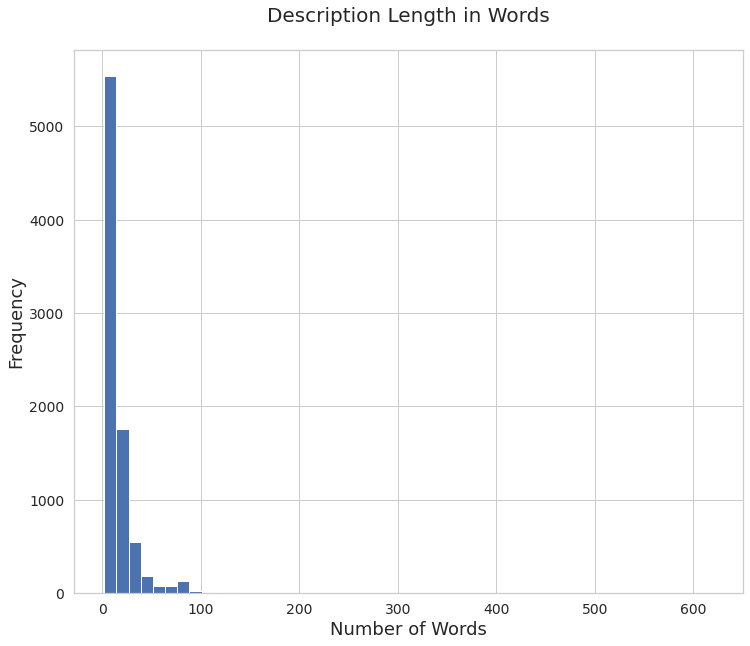

In [ ]:
ax=df_tranlated_inc['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Description Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

### Number of unique words in each article

In [ ]:
df_tranlated_inc['uniq_wds'] = df_tranlated_inc['cleaned_description'].str.split().apply(lambda x: len(set(x)))
df_tranlated_inc['uniq_wds'].head()

0    16
1    11
2     4
3     4
4     2
Name: uniq_wds, dtype: int64

### average (mean) number of unique words per incident, and the minimum and maximum unique word counts.

In [ ]:
print(df_tranlated_inc['uniq_wds'].mean())
print(df_tranlated_inc['uniq_wds'].min())
print(df_tranlated_inc['uniq_wds'].max())

11.582139050100675
1
370


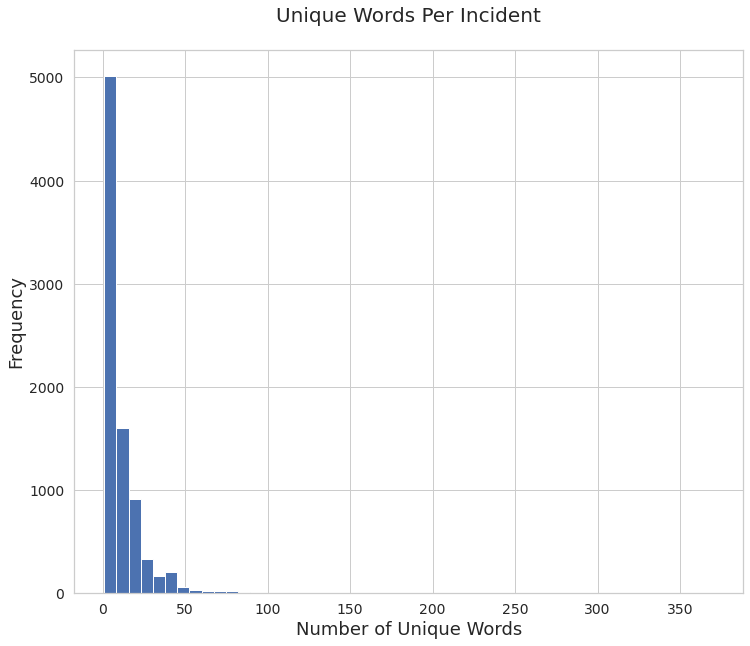

In [ ]:
ax=df_tranlated_inc['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Incident\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

When we plot this into a chart, we can see that while the distribution of unique words is still skewed, it looks a bit similar to the distribution based on total word counts we generated earlier.

### Mean Number of Words in tickets per Assignment Group

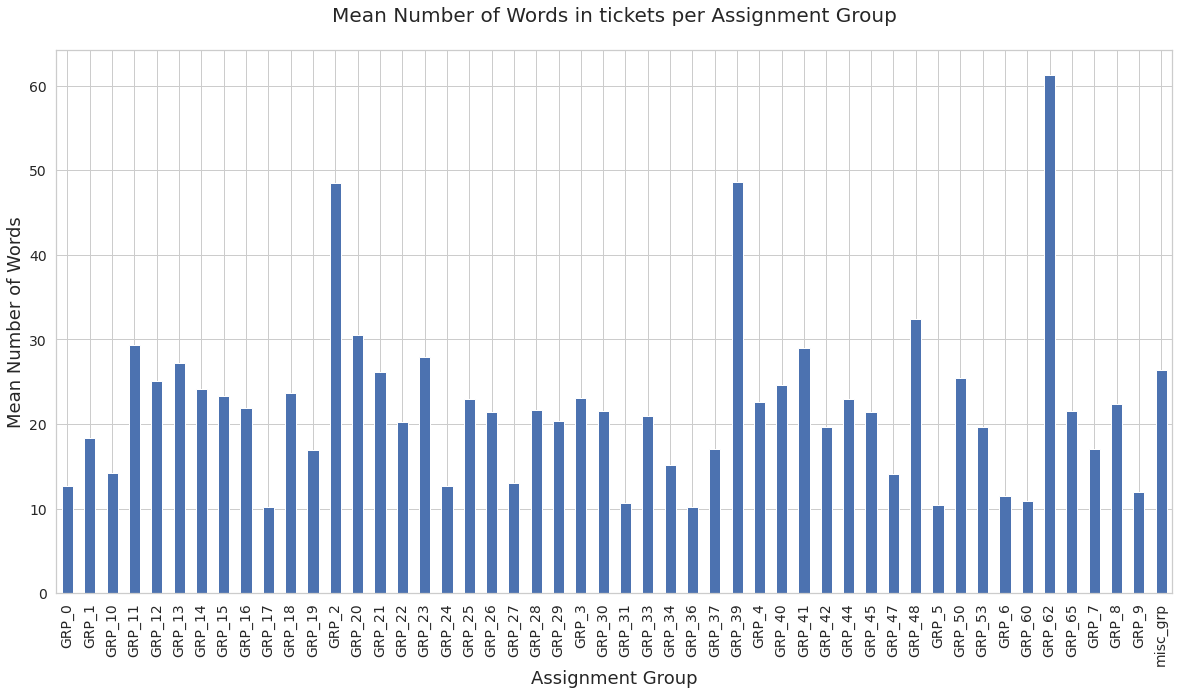

In [ ]:
assign_grps = df_tranlated_inc.groupby('Assignment group')
ax=assign_grps['num_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Words in tickets per Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

### Mean Number of Unique Words in tickets per Assignment Group

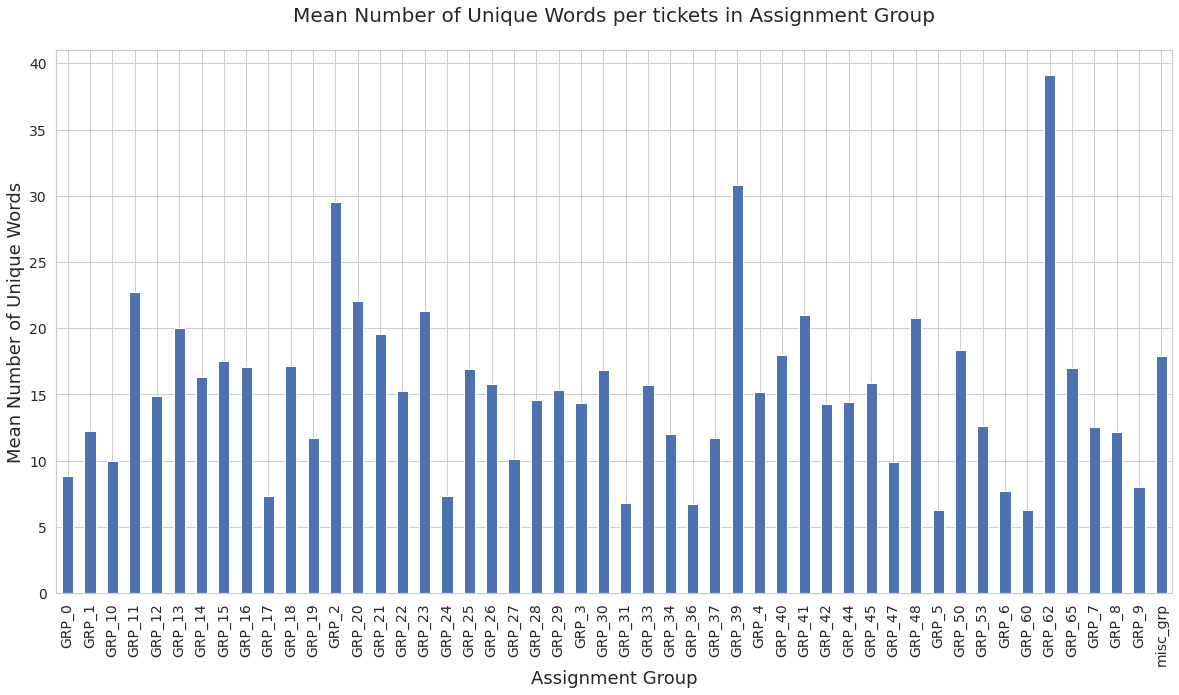

In [ ]:
ax=assign_grps['uniq_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Unique Words per tickets in Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Unique Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

Finally, let’s look at the most common words over the entire corpus.

In [ ]:
wd_counts = Counter()
for i, row in df_tranlated_inc.iterrows():
    wd_counts.update(row['cleaned_description'].split())
    
wd_counts.most_common(20)

[('password', 2046),
 ('job', 2004),
 ('erp', 1937),
 ('jobscheduler', 1914),
 ('failed', 1706),
 ('yesnona', 1568),
 ('unable', 1478),
 ('reset', 1425),
 ('user', 1412),
 ('t', 1263),
 ('issue', 1224),
 ('account', 1197),
 ('access', 1086),
 ('error', 962),
 ('need', 877),
 ('outlook', 855),
 ('ticket', 842),
 ('company', 838),
 ('working', 812),
 ('site', 793)]

Above, we can see some pretty predictable words

### Tokenization
Tokenization is a process that splits an input sequence into so-called tokens where the tokens can be a word, sentence, paragraph etc.

In [ ]:
import nltk
# Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df_tranlated_inc['token_desc'] = df_tranlated_inc['cleaned_description'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
df_tranlated_inc['token_desc'].head()

0    [login, issue, verified, user, detailsemployee...
1    [outlook, teammy, meetingsskype, meeting, etc,...
2                        [cant, log, vpn, cannot, log]
3    [unable, access, hrtool, page, unable, access,...
4                         [skype, error, skype, error]
Name: token_desc, dtype: object

In [ ]:
# After preprocessing, the text format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

df_tranlated_inc['token_desc'] = df_tranlated_inc['token_desc'].apply(lambda x : combine_text(x))

In [ ]:
df_tranlated_inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8443 entries, 0 to 8499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      8443 non-null   int64  
 1   Assignment group                8443 non-null   object 
 2   Target                          8443 non-null   object 
 3   short_description_avg_word_len  8443 non-null   float64
 4   short_description_nupper1       8443 non-null   float64
 5   short_description_nupper2       8443 non-null   float64
 6   short_description_nupper        8443 non-null   float64
 7   short_description_ndigits       8443 non-null   int64  
 8   language                        8443 non-null   object 
 9   cleaned_description             8443 non-null   object 
 10  num_wds                         8443 non-null   int64  
 11  avg_word                        8443 non-null   float64
 12  uniq_wds                        84

In [ ]:
df_tranlated_inc.to_csv("/content/drive/MyDrive/ColabNotebooks/PGP_AIML_Data/Capstone project/Group_10 - NLP1 Project Common WorkSpace/cleanedData.csv")

In [ ]:
df_tranlated_inc1 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/PGP_AIML_Data/Capstone project/Group_10 - NLP1 Project Common WorkSpace/cleanedData.csv',encoding='utf-8')
df_tranlated_inc1.head()

,Unnamed: 0,Unnamed: 0.1,Assignment group,Target,short_description_avg_word_len,short_description_nupper1,short_description_nupper2,short_description_nupper,short_description_ndigits,language,cleaned_description,num_wds,avg_word,uniq_wds,token_desc
0,0,0,GRP_0,L1/L2,5.000000,0.0,0.0,0.0,0,en,login issue verified user detailsemployee mana...,19,7.157895,16,login issue verified user detailsemployee mana...
1,1,1,GRP_0,L1/L2,7.000000,0.0,0.0,0.0,0,en,outlook teammy meetingsskype meeting etc appea...,12,6.833333,11,outlook teammy meetingsskype meeting etc appea...
2,2,2,GRP_0,L1/L2,2.800000,0.0,0.0,0.0,0,en,cant log vpn cannot log,5,3.800000,4,cant log vpn cannot log
3,3,3,GRP_0,L1/L2,5.000000,0.0,0.0,0.0,0,en,unable access hrtool page unable access hrtool...,8,5.500000,4,unable access hrtool page unable access hrtool...
4,4,4,GRP_0,L1/L2,3.333333,0.0,0.0,0.0,0,no,skype error skype error,4,5.000000,2,skype error skype error


In [ ]:
df_tranlated_inc1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Assignment group', 'Target',
       'short_description_avg_word_len', 'short_description_nupper1',
       'short_description_nupper2', 'short_description_nupper',
       'short_description_ndigits', 'language', 'cleaned_description',
       'num_wds', 'avg_word', 'uniq_wds', 'token_desc'],
      dtype='object')

In [ ]:
df_tranlated_inc2= df_tranlated_inc1.drop(['Unnamed: 0','Unnamed: 0.1','short_description_avg_word_len', 'short_description_nupper','short_description_ndigits'], axis=1)
df_tranlated_inc2.head(5)


,Assignment group,Target,short_description_nupper1,short_description_nupper2,language,cleaned_description,num_wds,avg_word,uniq_wds,token_desc
0,GRP_0,L1/L2,0.0,0.0,en,login issue verified user detailsemployee mana...,19,7.157895,16,login issue verified user detailsemployee mana...
1,GRP_0,L1/L2,0.0,0.0,en,outlook teammy meetingsskype meeting etc appea...,12,6.833333,11,outlook teammy meetingsskype meeting etc appea...
2,GRP_0,L1/L2,0.0,0.0,en,cant log vpn cannot log,5,3.800000,4,cant log vpn cannot log
3,GRP_0,L1/L2,0.0,0.0,en,unable access hrtool page unable access hrtool...,8,5.500000,4,unable access hrtool page unable access hrtool...
4,GRP_0,L1/L2,0.0,0.0,no,skype error skype error,4,5.000000,2,skype error skype error


In [ ]:
df_tranlated_inc2.to_csv("/content/drive/MyDrive/ColabNotebooks/PGP_AIML_Data/Capstone project/Group_10 - NLP1 Project Common WorkSpace/cleanedData.csv")

In [ ]:
df_tranlated_inc2.columns

Index(['Assignment group', 'Target', 'short_description_nupper1',
       'short_description_nupper2', 'language', 'cleaned_description',
       'num_wds', 'avg_word', 'uniq_wds', 'token_desc'],
      dtype='object')

### Transforming tokens to a vector using tfidf

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf for ticket
tfidf = TfidfVectorizer(max_features=250, analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
inc_tfidf = tfidf.fit_transform(df_tranlated_inc2['token_desc'])

In [ ]:
len(inc_tfidf.todense())

8443

In [ ]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Below is the 10 tokens with the lowest tfidf score, which is unsurprisingly, very generic words that we could not use to distinguish one description from another.

In [ ]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
erp,3.106814
job,3.112674
password,3.132457
jobscheduler,3.165979
failed,3.265845
unable,3.276172
reset,3.284279
issue,3.324617
failed jobscheduler,3.344177
jobscheduler job,3.375528


Below is the 10 tokens with the highest tfidf score, which includes words that are a lot specific that by looking at them, we could guess the categories that they belong to:

In [ ]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(20)

,tfidf
dst outside,8.095301
outside accessgroup,8.095301
dst,7.643316
src inside,7.643316
accessgroup,7.643316
accessgroup aclinside,7.643316
src,7.643316
aclinside,7.643316
asa deny,7.643316
inside dst,7.643316


### TF-IDF Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


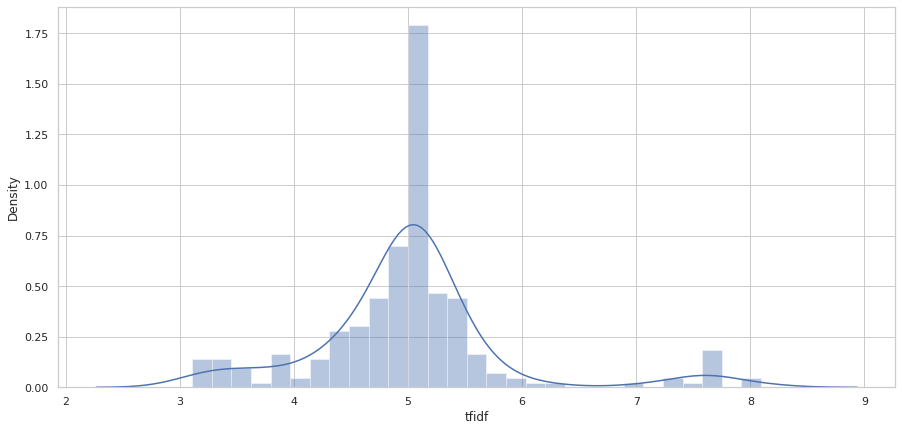

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(tfidf["tfidf"])

Given the high dimension of our tfidf matrix, we need to reduce their dimension using the Singular Value Decomposition (SVD) technique. And to visualize our vocabulary, we could next use t-SNE to reduce the dimension to 2. t-SNE is more suitable for dimensionality reduction to 2 or 3.

### Dimentionality reduction using t-SNE

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_comp=10
svd = TruncatedSVD(n_components=n_comp, random_state=42)
svd_tfidf = svd.fit_transform(inc_tfidf)

In [ ]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8443 samples in 0.033s...
[t-SNE] Computed neighbors for 8443 samples in 0.547s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8443
[t-SNE] Computed conditional probabilities for sample 2000 / 8443
[t-SNE] Computed conditional probabilities for sample 3000 / 8443
[t-SNE] Computed conditional probabilities for sample 4000 / 8443
[t-SNE] Computed conditional probabilities for sample 5000 / 8443
[t-SNE] Computed conditional probabilities for sample 6000 / 8443
[t-SNE] Computed conditional probabilities for sample 7000 / 8443
[t-SNE] Computed conditional probabilities for sample 8000 / 8443
[t-SNE] Computed conditional probabilities for sample 8443 / 8443
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.475090
[t-SNE] KL divergence after 500 iterations: 0.953285


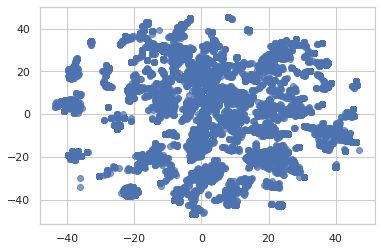

In [ ]:
tfidf_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])
plt.scatter(tfidf_df.x, tfidf_df.y, alpha=0.7)

<b> We can see there are multiple smaller clusters here, each cluster could be the type of tickets that we have in the dataset. </b>


### Generate Topics using LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
# create count vectorizer first
cvectorizer = CountVectorizer(min_df=4, max_features=4000, ngram_range=(1,2))
cvz = cvectorizer.fit_transform(df_tranlated_inc2['token_desc'])

# generate topic models using Latent Dirichlet Allocation
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20, random_state=42)
X_topics = lda_model.fit_transform(cvz)

In [ ]:
n_top_words = 10
topic_summaries = []

# get topics and topic terms
topic_word = lda_model.components_ 
vocab = cvectorizer.get_feature_names()

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))

Topic 0: access | error | unable | file | collaborationplatform | log | open | erp | drive | able
Topic 1: ticket | update | tcp | ticket update | id | asa | user | inside | deny | inside dst
Topic 2: job | jobscheduler | failed | failed jobscheduler | job failed | jobscheduler job | abended | job jobscheduler | abended job | jobscheduler abended
Topic 3: yesnona | site | power | circuit | backup | backup circuit | outage | et | company | network
Topic 4: unable | crm | login | issue | skype | call | working | laptop | unable login | uacyltoe
Topic 5: outlook | unable | error | server | issue | vpn | connect | order | screen | working
Topic 6: password | reset | password reset | erp | account | reset password | window | unlock | passwordmanagementtool | passwordmanagementtool password
Topic 7: email | new | need | company | change | printer | phone | device | work | time
Topic 8: user | erp | account | locked | system | account locked | need | id | connection | issue
Topic 9: event | r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<b> We can see that password related tickets are classified as topic 3, account related tickets in topic 7 , job scheduler related tickets in topic 8 etc </b>

### tf-idf array into pandas dataframe

In [ ]:
# collect the tfid matrix in numpy array
array = inc_tfidf.todense()

# store the tf-idf array into pandas dataframe
df_inc = pd.DataFrame(array)
df_inc.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,0.0,0.0,0.234829,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307792,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.453711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.268861,0.0,0.0,0.0,0.0,0.0,0.269682,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.590058,0.0,0.0,0.0,0.0,0.281587,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365302,0.414527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.745505,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

#### Adding the output to the dataframe

In [ ]:
df_tranlated_inc2.head()

,Assignment group,Target,short_description_nupper1,short_description_nupper2,language,cleaned_description,num_wds,avg_word,uniq_wds,token_desc
0,GRP_0,L1/L2,0.0,0.0,en,login issue verified user detailsemployee mana...,19,7.157895,16,login issue verified user detailsemployee mana...
1,GRP_0,L1/L2,0.0,0.0,en,outlook teammy meetingsskype meeting etc appea...,12,6.833333,11,outlook teammy meetingsskype meeting etc appea...
2,GRP_0,L1/L2,0.0,0.0,en,cant log vpn cannot log,5,3.800000,4,cant log vpn cannot log
3,GRP_0,L1/L2,0.0,0.0,en,unable access hrtool page unable access hrtool...,8,5.500000,4,unable access hrtool page unable access hrtool...
4,GRP_0,L1/L2,0.0,0.0,no,skype error skype error,4,5.000000,2,skype error skype error


In [ ]:
df_inc['num_wds']= df_tranlated_inc2['num_wds']
df_inc['avg_word']= df_tranlated_inc2['avg_word']
df_inc['Assignment group']= df_tranlated_inc2['Assignment group']
df_inc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,num_wds,avg_word,Assignment group
0,0.0,0.0,0.234829,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.453711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.268861,0.0,0.0,0.0,0.0,0.0,0.269682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.590058,0.0,0.0,0.0,0.0,0.281587,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,7.157895,GRP_0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,6.833333,GRP_0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365302,0.414527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.745505,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
features = df_inc.columns.tolist()
output = 'Assignment group'
# removing the output and the id from features
features.remove(output)

In [ ]:
df_inc_sample = df_inc[df_inc['Assignment group'].map(df_inc['Assignment group'].value_counts()) > 100]

In [ ]:
df_inc_sample.shape

(7027, 253)

In [ ]:
df_inc_sample['Assignment group'].value_counts()

GRP_0     3975
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      182
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
Name: Assignment group, dtype: int64

In [ ]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

## Model Building primary insights

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [ ]:
df_inc_sample = df_tranlated_inc2[df_tranlated_inc2['Assignment group'].map(df_tranlated_inc2['Assignment group'].value_counts()) > 100]
x = df_inc_sample['token_desc']
y = df_inc_sample['Assignment group']

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)


log_cols=["Classifier", "accuracy","f1_score"]
log = pd.DataFrame(columns=log_cols)

### Naive Bayes classifier for multinomial models

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

predictions = nb.predict_proba(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))


log_entry = pd.DataFrame([["MultinomialNB",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

accuracy 0.6770981507823614
f1 score 0.7857181616152683
logloss: 1.302 
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       795
           1       0.00      0.00      0.00        28
           2       0.77      0.19      0.31        52
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        43
           6       0.75      0.12      0.21        48
           7       0.91      0.36      0.52        58
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        40
          10       0.00      0.00      0.00        21
          11       0.00      0.00      0.00        26
          12       0.00      0.00      0.00        36
          13       0.54      0.91      0.67       132
          14       0.00      0.00      0.00        51

    accuracy                           0.68      1406
   macro

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Linear Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC

svc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42))),
               ])
svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 OneVsRestClassifier(estimator=LinearSVC(loss='hinge',
                                                         random_state=42)))])

In [ ]:
y_pred = svc.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
#print (focal_loss(alpha=.25, gamma=2))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["LinearSVC",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

accuracy 0.7197724039829303
f1 score 0.7305137925209496
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       795
           1       0.69      0.32      0.44        28
           2       0.64      0.54      0.58        52
           3       0.11      0.62      0.19        29
           4       0.13      0.21      0.16        24
           5       0.62      0.23      0.34        43
           6       0.68      0.44      0.53        48
           7       0.88      0.91      0.90        58
           8       0.92      0.48      0.63        23
           9       0.67      0.30      0.41        40
          10       0.64      0.33      0.44        21
          11       0.00      0.00      0.00        26
          12       0.77      0.28      0.41        36
          13       0.93      0.39      0.55       132
          14       0.77      0.20      0.31        51

    accuracy                           0.72      1406
   macro avg       0.62 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SGD Classifier


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
y_pred = sgd.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["SGDClassifier",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

accuracy 0.689900426742532
f1 score 0.7407424109609074
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       795
           1       0.00      0.00      0.00        28
           2       0.74      0.27      0.39        52
           3       0.62      0.17      0.27        29
           4       0.40      0.08      0.14        24
           5       1.00      0.07      0.13        43
           6       0.88      0.31      0.46        48
           7       0.88      0.79      0.84        58
           8       1.00      0.22      0.36        23
           9       0.00      0.00      0.00        40
          10       1.00      0.10      0.17        21
          11       0.13      0.85      0.23        26
          12       1.00      0.25      0.40        36
          13       0.89      0.37      0.52       132
          14       1.00      0.10      0.18        51

    accuracy                           0.69      1406
   macro avg       0.69  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [ ]:
y_pred = logreg.predict(X_test)
predictions = logreg.predict_proba(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["LogisticRegression",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

accuracy 0.7652916073968705
f1 score 0.788195247288123
logloss: 1.163 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       795
           1       0.71      0.36      0.48        28
           2       0.55      0.54      0.54        52
           3       0.80      0.55      0.65        29
           4       0.40      0.25      0.31        24
           5       0.45      0.42      0.43        43
           6       0.66      0.60      0.63        48
           7       0.91      0.90      0.90        58
           8       0.76      0.57      0.65        23
           9       0.64      0.40      0.49        40
          10       0.58      0.33      0.42        21
          11       0.00      0.00      0.00        26
          12       0.82      0.25      0.38        36
          13       0.56      0.93      0.70       132
          14       0.86      0.24      0.37        51

    accuracy                           0.77      1406
   macro 

Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rvc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=100)),
               ])
rvc.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])

In [ ]:
y_pred = rvc.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
#print (focal_loss(alpha=.25, gamma=2))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["RandomForestClassifier",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

accuracy 0.7496443812233285
f1 score 0.8048581130336888
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       795
           1       0.67      0.07      0.13        28
           2       0.68      0.33      0.44        52
           3       0.71      0.41      0.52        29
           4       0.50      0.17      0.25        24
           5       0.55      0.14      0.22        43
           6       0.86      0.40      0.54        48
           7       0.88      0.88      0.88        58
           8       1.00      0.35      0.52        23
           9       0.75      0.15      0.25        40
          10       0.71      0.24      0.36        21
          11       0.00      0.00      0.00        26
          12       0.77      0.28      0.41        36
          13       0.55      0.92      0.69       132
          14       1.00      0.10      0.18        51

    accuracy                           0.75      1406
   macro avg       0.69 

### Xgboost

In [ ]:
import xgboost as xgb

xgboost = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)),
               ])
xgboost.fit(X_train, y_train)




Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 XGBClassifier(colsample_bytree=0.8, max_depth=7,
                               n_estimators=200, nthread=10,
                               objective='multi:softprob', subsample=0.8))])

In [ ]:
y_pred = xgboost.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["Xgboost",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

accuracy 0.7496443812233285
f1 score 0.7856375698736238
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       795
           1       0.54      0.25      0.34        28
           2       0.59      0.52      0.55        52
           3       0.65      0.38      0.48        29
           4       0.42      0.21      0.28        24
           5       0.44      0.16      0.24        43
           6       0.77      0.50      0.61        48
           7       0.89      0.84      0.87        58
           8       0.75      0.52      0.62        23
           9       0.32      0.15      0.20        40
          10       0.56      0.43      0.49        21
          11       0.33      0.04      0.07        26
          12       0.83      0.28      0.42        36
          13       0.55      0.91      0.69       132
          14       0.80      0.16      0.26        51

    accuracy                           0.75      1406
   macro avg       0.62 

In [ ]:
log.set_index(["Classifier"],inplace=True)
log.sort_values(by=['f1_score'])

,accuracy,f1_score
Classifier,,
LinearSVC,0.719772,0.730514
SGDClassifier,0.689900,0.740742
Xgboost,0.749644,0.785638
MultinomialNB,0.677098,0.785718
LogisticRegression,0.765292,0.788195
RandomForestClassifier,0.749644,0.804858


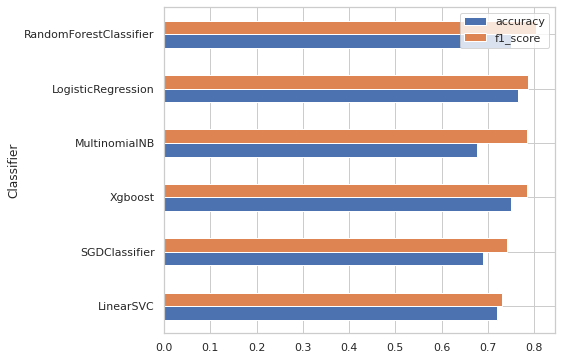

In [ ]:
log.sort_values(by=['f1_score']).plot(kind='barh',figsize=[7,6])

# Final Thoughts

- First, we examined the dataset provided to us, determining the structure of the data - the number of columns, fields, datatypes, and so on. 
  We conducted exploratory data analysis to gain additional insights from this data set and discovered that - data is highly imbalanced, 
  with approximately 45 percent of Groups having fewer than 20 tickets.
- A few tickets are in foreign languages, such as German. 
- The data contains a lot of noise, for example, a few tickets related to account setup are spread across multiple assignment groups.

- We cleaned the data and preprocessed it.
- Translation: A few tickets were written in German. As a result, we used the Google Translate Python API to convert German to English in order to generate the input data for the following steps.
  However, because the Google Translate Rest API can only process a limited number of texts per day, we translated the text in batches and saved the file for later use.
- Make all text lowercase so that the algorithm does not confuse the same words in different cases.
- Removing Noise, which is anything that isn't a standard number or letter, such as punctuation and numerical values.
- Eliminating extract spaces
- Removed punctuation - Removed numbers from words
- Stopword Removal: Some extremely common words that appear to be of little value in assisting in the selection of documents matching a user's need are sometimes removed entirely from the vocabulary.
  These are referred to as stop words.
- Lemmatization
- Tokenization: Tokenization is simply a term used to describe the process of converting normal text strings into a list of tokens, or words that we actually want. Sentence tokenizer can be used to find a list of sentences, 
  and Word tokenizer can be used to find a list of words in strings.

- We then used the cleaned and preprocessed dataset to run a basic benchmark model.
- Because the dataset is highly skewed, we only considered a subset of groups for predictions. In 74 groups, 46 percent of tickets belong to Group 1 and 16 groups only have more than 100 tickets; 
  the remaining Assignment groups have very low ticket counts that may not add much value to the model prediction. If we conducted random sampling across all subcategories, we would risk missing all of the tickets in some categories. 
  
  As a result, we considered groups with more than 100 tickets.
- We used the following models to train the data:
- Linear Support Vector Machine 
- Multinomial NB
- SGD Classifier
- Linear SVC
- Xgboost 
- LogisticRegression
- Random Forest Classifier has maximum performance
- accuracy 0.749644
- f1 score 0.804858


<b> However, it appears that the call is biassed towards GRP 0, which has the majority of samples. </b>

## Next Steps - We could improve the model further by 
- exploring more features from the dataset 
- tuning hyperparameters using GridsearchCV,
- Experiment with transfer learning and word embeddings as a modelling feature.
- To improve model performance, use neural network architecture such as RNN or LSTM.

# Model Building using CleanedData.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
projectpath = '/content/drive/My Drive/DataForColab/'
file_name ='cleanedData.csv'
df=pd.read_csv(projectpath + file_name)
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Unnamed: 0,Unnamed: 0.1,Assignment group,Target,short_description_avg_word_len,short_description_nupper,short_description_ndigits,cleaned_description,num_wds,avg_word,uniq_wds,token_desc
0,0,0,GRP_0,L1/L2,5.000000,0,0,login issue verified user detailsemployee mana...,19,7.157895,16,login issue verified user detailsemployee mana...
1,1,1,GRP_0,L1/L2,7.000000,0,0,outlook teammy meetingsskype meeting etc appea...,12,6.833333,11,outlook teammy meetingsskype meeting etc appea...
2,2,2,GRP_0,L1/L2,2.800000,0,0,cant log vpn cannot log,5,3.800000,4,cant log vpn cannot log
3,3,3,GRP_0,L1/L2,5.000000,0,0,unable access hrtool page unable access hrtool...,8,5.500000,4,unable access hrtool page unable access hrtool...
4,4,4,GRP_0,L1/L2,3.333333,0,0,skype error skype error,4,5.000000,2,skype error skype error


In [ ]:
df_cleaned = pd.DataFrame()
df_cleaned['Assignment group'] = df['Assignment group']
df_cleaned['cleaned_description'] = df['cleaned_description']

In [ ]:
# less than 10 tickets group merging into one misc_grp
sample = df_cleaned.groupby(['Assignment group'])
regroup=[]
for grp in df_cleaned['Assignment group'].unique():
  if(sample.get_group(grp).shape[0]<10):
    regroup.append(grp)
print('Found {} groups which have under 10 samples'.format(len(regroup)))
df_cleaned['Assignment group']=df_cleaned['Assignment group'].apply(lambda x : 'misc_grp' if x in regroup  else x)

# Unique Groups in cleaned dataset
df_cleaned['Assignment group'].unique()

Found 26 groups which have under 10 samples


array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'misc_grp', 'GRP_36', 'GRP_37', 'GRP_39',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_50', 'GRP_53', 'GRP_60', 'GRP_62', 'GRP_65'], dtype=object)

In [ ]:
# Lemmetization and stop word removal
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

sr = stopwords.words('english')
for i,text in enumerate(df_cleaned['cleaned_description']):
  df_cleaned['cleaned_description'][i]=" ".join(word for word in text.split(' ') if word not in sr)

# install spacy and plt for gensim  
!pip install -q spacy 
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

df_cleaned['cleaned_description'] = df_cleaned['cleaned_description'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Label encoding
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

df_cleaned['Assignment group'],grp_mapping_all_raw = labelencoder(df_cleaned['Assignment group'])


Modelling

In [ ]:
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Add Function to capture results from each model 
import operator
def captureData(dataframe,modelHistory,modelName,descriptions,index_df,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    index, acc_value = max(enumerate(modelHistory.history['val_accuracy']), key=operator.itemgetter(1))
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'val_accuracy': [acc_value],
      'val_loss':[modelHistory.history['val_loss'][index]],
      'loss':[modelHistory.history['loss'][index]],
      'accuracy':[modelHistory.history['accuracy'][index]],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','val_accuracy' ,'val_loss','loss','accuracy','descriptions']] 
  return dataframe

def capturePrediction(dataframe,modelName,descriptions,index_df,pred_accuracy,pred_F1, resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'Pred_Accuracy' : [pred_accuracy],
       'Pred_F1' : [pred_F1],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','Pred_Accuracy','Pred_F1','descriptions']] 
  return dataframe

Glove Embedding

In [ ]:
glove_file = projectpath + "glove.6B.zip"
print(glove_file)
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

/content/drive/My Drive/DataForColab/glove.6B.zip


In [ ]:
EMBEDDING_FILE = './glove.6B.100d.txt'
embeddings_glove = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    embeddings_glove[word] = embd

In [ ]:
# defining variables for model building
maxlen = 300
numWords=9000
epochs = 10

## LSTM + Glove model

In [ ]:
class LstmGloveModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['cleaned_description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_glove.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer) 
    lstm=Bidirectional(LSTM(128))(embed)
    drop=Dropout(0.3)(lstm)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
    self.model.summary()
    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))
    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)     
     print("Accuracy of the model :",accuracy)
     f1_score = metrics.f1_score(self.y_test, pred,average='weighted')     
     print("F1 score of the model :",f1_score)
     return accuracy,f1_score

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [ ]:
# Raw data + Glove + LSTM bidirectional
lstmModelRawData = LstmGloveModel()
lstmModelRawData_history, model = lstmModelRawData.train(df_cleaned,100,epochs)
lstm_raw_accuracy , lstm_raw_F1 = lstmModelRawData.prediction()

Number of Samples: 8443
Number of Labels:  8443
Number of train Samples: 6754
Number of val Samples: 1689
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 100)          900100    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 100)               25700     
                                                                 
 dense_1 (Dense)   

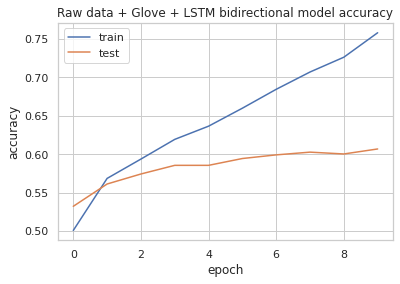

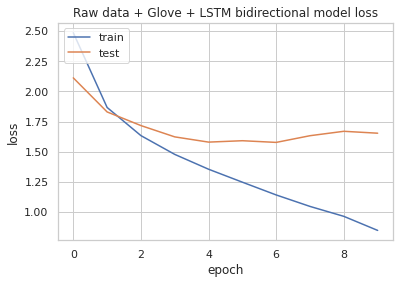

In [ ]:
lstmModelRawData.plotModelAccuracy(lstmModelRawData_history, 'Raw data + Glove + LSTM bidirectional')

Capture results in dataframe

In [ ]:
results=pd.DataFrame()
pred_results = pd.DataFrame()

In [ ]:
results=captureData(results,lstmModelRawData_history,'LSTM model_GloVe_rawdata','LSTM+GloVe Embedding on raw data','1',0)
pred_results= capturePrediction(pred_results,'LSTM model_GloVe_rawdata','LSTM+GloVe Embedding on raw data','1',lstm_raw_accuracy,lstm_raw_F1,0)

In [ ]:
results

,model,val_accuracy,val_loss,loss,accuracy,descriptions
1,LSTM model_GloVe_rawdata,0.606868,1.653816,0.847837,0.758069,LSTM+GloVe Embedding on raw data


In [ ]:
pred_results

,model,Pred_Accuracy,Pred_F1,descriptions
1,LSTM model_GloVe_rawdata,0.606868,0.557877,LSTM+GloVe Embedding on raw data


## GRU + Glove Model

In [ ]:
class GruGloveModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['cleaned_description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_glove.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer) 
    gru=GRU(128)(embed)
    drop=Dropout(0.3)(gru)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    self.model.summary()

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))
    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy=metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     f1_score = metrics.f1_score(self.y_test, pred,average='weighted')     
     print("F1 score of the model :",f1_score)
     return accuracy,f1_score

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

  def plotModel(self):
    self.model.summary()

In [ ]:
# Raw data + Glove + GRU
gruModelRawData = GruGloveModel()
gruModelRawData_history, model = gruModelRawData.train(df_cleaned,100,epochs)
gruRaw_accuracy, gruRaw_f1 = gruModelRawData.prediction()

Number of Samples: 8443
Number of Labels:  8443
Number of train Samples: 6754
Number of val Samples: 1689
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 300, 100)          900100    
                                                                 
 gru (GRU)                   (None, 128)               88320     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               12900     
                                                                 
 dense_3 (Dense)             (None, 49)                4949      
                   

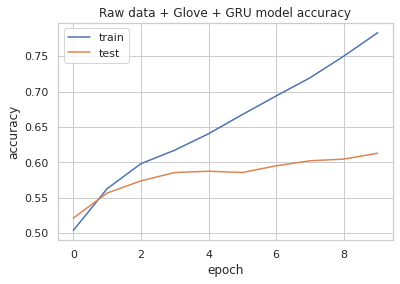

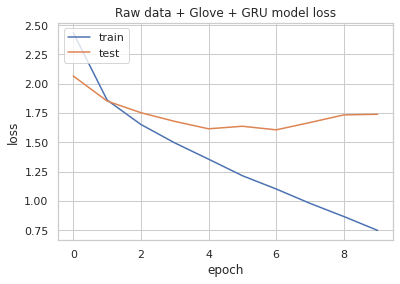

In [ ]:
gruModelRawData.plotModelAccuracy(gruModelRawData_history, 'Raw data + Glove + GRU')

Capture results in dataframe

In [ ]:
results=captureData(results,gruModelRawData_history,'GRU model_GloVe_rawdata','GRU+GloVe Embedding on raw data','2',0)
pred_results= capturePrediction(pred_results,'GRU model_GloVe_rawdata','GRU+GloVe Embedding on raw data','2',gruRaw_accuracy,gruRaw_f1,0)

In [ ]:
results

,model,val_accuracy,val_loss,loss,accuracy,descriptions
1,LSTM model_GloVe_rawdata,0.606868,1.653816,0.847837,0.758069,LSTM+GloVe Embedding on raw data
2,GRU model_GloVe_rawdata,0.612789,1.739606,0.748338,0.783091,GRU+GloVe Embedding on raw data


In [ ]:
pred_results

,model,Pred_Accuracy,Pred_F1,descriptions
1,LSTM model_GloVe_rawdata,0.606868,0.557877,LSTM+GloVe Embedding on raw data
2,GRU model_GloVe_rawdata,0.612789,0.560837,GRU+GloVe Embedding on raw data


## RNN + Glove model

In [ ]:
class RNNGloveModel:
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['cleaned_description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_glove.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def train(self, dataframe, batch_size, epochs):
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)

    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)
    model=Sequential()
    model.add(Input(shape=(maxlen,),dtype=tf.int64))
    model.add(embed)
    model.add(Conv1D(100,10,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Conv1D(100,10,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dropout(0.3))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(len((pd.Series(y_train)).unique()),activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    model.summary()
    plot_model(model,to_file="RNN.jpg")

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val, y_Val))
    return model_history, model

  def prediction(self,model):
      
     pred = model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     f1_score = metrics.f1_score(self.y_test, pred,average='weighted')     
     print("Accuracy of the model :",f1_score)
     return accuracy,f1_score

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [ ]:
RNNModelRawData = RNNGloveModel()
RNNModelRawData_history, RnnModel = RNNModelRawData.train(df_cleaned,100,epochs)
RNNModelRawData_accuracy , RNNModelRawData_f1 = RNNModelRawData.prediction(RnnModel)

Number of Samples: 8443
Number of Labels:  8443
Number of train Samples: 6754
Number of val Samples: 1689
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 100)          900100    
                                                                 
 conv1d (Conv1D)             (None, 291, 100)          100100    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 145, 100)         0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 145, 100)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 136, 100)          100100    
                                                                 
 max_pooling1d_1

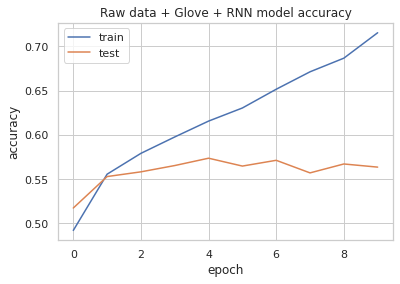

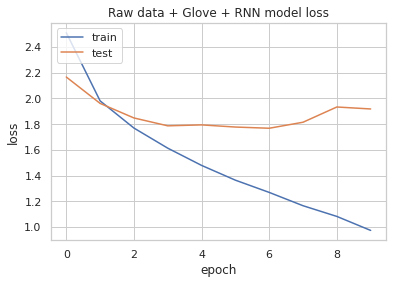

In [ ]:
RNNModelRawData.plotModelAccuracy(RNNModelRawData_history, 'Raw data + Glove + RNN')

In [ ]:
results=captureData(results,RNNModelRawData_history,'RNN model_GloVe_rawdata','RNN+GloVe Embedding on raw data','3',0)
pred_results= capturePrediction(pred_results,'RNN model_GloVe_rawdata','RNN+GloVe Embedding on raw data','3',RNNModelRawData_accuracy,RNNModelRawData_f1,0)

In [ ]:
results

,model,val_accuracy,val_loss,loss,accuracy,descriptions
1,LSTM model_GloVe_rawdata,0.606868,1.653816,0.847837,0.758069,LSTM+GloVe Embedding on raw data
2,GRU model_GloVe_rawdata,0.612789,1.739606,0.748338,0.783091,GRU+GloVe Embedding on raw data
3,RNN model_GloVe_rawdata,0.573712,1.794478,1.479673,0.615635,RNN+GloVe Embedding on raw data


In [ ]:
pred_results

,model,Pred_Accuracy,Pred_F1,descriptions
1,LSTM model_GloVe_rawdata,0.606868,0.557877,LSTM+GloVe Embedding on raw data
2,GRU model_GloVe_rawdata,0.612789,0.560837,GRU+GloVe Embedding on raw data
3,RNN model_GloVe_rawdata,0.563647,0.514013,RNN+GloVe Embedding on raw data


## Word2Vec Embedding

In [ ]:
sentences = [line.split(' ') for line in df_cleaned['cleaned_description']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format(projectpath+ 'word2vec_vector.txt')

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
emb = open(projectpath+'word2vec_vector.txt')

for line in emb:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
emb.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 14676 word vectors.


## LSTM  + Word2Vec model

In [ ]:
class LstmWord2VecModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['cleaned_description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer) 
    lstm=Bidirectional(LSTM(128))(embed)
    drop=Dropout(0.3)(lstm)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))
    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     f1_score = metrics.f1_score(self.y_test, pred,average='weighted')     
     print("Accuracy of the model :",f1_score)
     return accuracy,f1_score

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [ ]:
# Raw data + Word2Vec + LSTM bidirectional
lstmModelRawData = LstmWord2VecModel()
lstmModelRawData_history, model = lstmModelRawData.train(df_cleaned,100,epochs)
lstm_raw_accuracy , lstm_raw_f1 = lstmModelRawData.prediction()

Number of Samples: 8443
Number of Labels:  8443
Number of train Samples: 6754
Number of val Samples: 1689
Epoch 1/10
67/68 [============================>.] - ETA: 0s - loss: 2.2943 - accuracy: 0.5197
Epoch 1: val_accuracy improved from -inf to 0.53523, saving model to model-001-0.535228.h5
68/68 [==============================] - 7s 56ms/step - loss: 2.2911 - accuracy: 0.5200 - val_loss: 2.0149 - val_accuracy: 0.5352 - lr: 0.0010
Epoch 2/10
67/68 [============================>.] - ETA: 0s - loss: 1.8491 - accuracy: 0.5709
Epoch 2: val_accuracy improved from 0.53523 to 0.55832, saving model to model-002-0.558319.h5
68/68 [==============================] - 3s 43ms/step - loss: 1.8486 - accuracy: 0.5711 - val_loss: 1.8467 - val_accuracy: 0.5583 - lr: 0.0010
Epoch 3/10
67/68 [============================>.] - ETA: 0s - loss: 1.6899 - accuracy: 0.5839
Epoch 3: val_accuracy improved from 0.55832 to 0.57786, saving model to model-003-0.577857.h5
68/68 [==============================] - 3s 43m

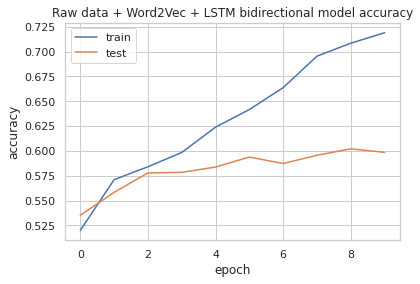

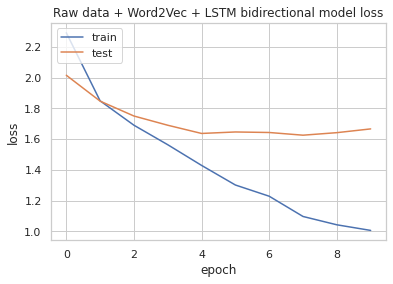

In [ ]:
lstmModelRawData.plotModelAccuracy(lstmModelRawData_history, 'Raw data + Word2Vec + LSTM bidirectional')

Capture results in dataframe

In [ ]:
results=captureData(results,lstmModelRawData_history,'LSTM model_Word2Vec_rawdata','LSTM+Word2Vec Embedding on raw data','4',0)
pred_results= capturePrediction(pred_results,'LSTM model_Word2Vec_rawdata','LSTM+Word2Vec Embedding on raw data','4',lstm_raw_accuracy,lstm_raw_f1,0)

In [ ]:
pred_results

,model,Pred_Accuracy,Pred_F1,descriptions
1,LSTM model_GloVe_rawdata,0.606868,0.557877,LSTM+GloVe Embedding on raw data
2,GRU model_GloVe_rawdata,0.612789,0.560837,GRU+GloVe Embedding on raw data
3,RNN model_GloVe_rawdata,0.563647,0.514013,RNN+GloVe Embedding on raw data
4,LSTM model_Word2Vec_rawdata,0.598579,0.538804,LSTM+Word2Vec Embedding on raw data


## GRU + Word2Vec Model

In [ ]:
class GruWord2VecModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['cleaned_description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer) 
    gru=GRU(128)(embed)
    drop=Dropout(0.3)(gru)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))
    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy=metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     f1_score = metrics.f1_score(self.y_test, pred,average='weighted')     
     print("F1 score of the model :",f1_score)
     return accuracy,f1_score

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

  def plotModel(self):
    self.model.summary()

In [ ]:
# Raw data + Word2Vec + GRU
gruModelRawData = GruWord2VecModel()
gruModelRawData_history, model = gruModelRawData.train(df_cleaned,100,epochs)
gruRaw_accuracy , gruRaw_f1 = gruModelRawData.prediction()

Number of Samples: 8443
Number of Labels:  8443
Number of train Samples: 6754
Number of val Samples: 1689
Epoch 1/10
66/68 [============================>.] - ETA: 0s - loss: 2.3220 - accuracy: 0.5117
Epoch 1: val_accuracy improved from -inf to 0.52812, saving model to model-001-0.528123.h5
68/68 [==============================] - 4s 30ms/step - loss: 2.3176 - accuracy: 0.5120 - val_loss: 2.1104 - val_accuracy: 0.5281 - lr: 0.0010
Epoch 2/10
67/68 [============================>.] - ETA: 0s - loss: 1.9150 - accuracy: 0.5628
Epoch 2: val_accuracy improved from 0.52812 to 0.55062, saving model to model-002-0.550622.h5
68/68 [==============================] - 1s 21ms/step - loss: 1.9177 - accuracy: 0.5620 - val_loss: 1.8824 - val_accuracy: 0.5506 - lr: 0.0010
Epoch 3/10
66/68 [============================>.] - ETA: 0s - loss: 1.7205 - accuracy: 0.5852
Epoch 3: val_accuracy improved from 0.55062 to 0.57608, saving model to model-003-0.576081.h5
68/68 [==============================] - 2s 23m

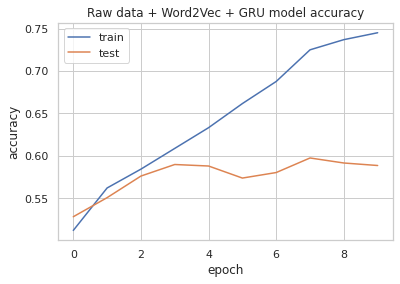

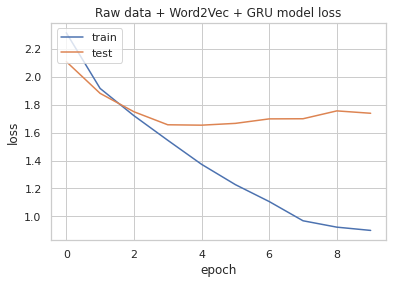

In [ ]:
gruModelRawData.plotModelAccuracy(gruModelRawData_history, 'Raw data + Word2Vec + GRU')

Capture results in dataframe

In [ ]:
results=captureData(results,gruModelRawData_history,'GRU model_Word2Vec_rawdata','GRU+Word2Vec Embedding on raw data','5',0)
pred_results= capturePrediction(pred_results,'GRU model_Word2Vec_rawdata','GRU+Word2Vec Embedding on raw data','5',gruRaw_accuracy,gruRaw_f1, 0)

In [ ]:
pred_results

,model,Pred_Accuracy,Pred_F1,descriptions
1,LSTM model_GloVe_rawdata,0.606868,0.557877,LSTM+GloVe Embedding on raw data
2,GRU model_GloVe_rawdata,0.612789,0.560837,GRU+GloVe Embedding on raw data
3,RNN model_GloVe_rawdata,0.563647,0.514013,RNN+GloVe Embedding on raw data
4,LSTM model_Word2Vec_rawdata,0.598579,0.538804,LSTM+Word2Vec Embedding on raw data
5,GRU model_Word2Vec_rawdata,0.588514,0.536617,GRU+Word2Vec Embedding on raw data


## RNN + Word2Vec model

In [ ]:
class RNNWord2VecModel:
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['cleaned_description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def train(self, dataframe, batch_size, epochs):
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)

    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)
    model=Sequential()
    model.add(Input(shape=(maxlen,),dtype=tf.int64))
    model.add(embed)
    model.add(Conv1D(100,10,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Conv1D(100,10,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dropout(0.3))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(len((pd.Series(y_train)).unique()),activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    model.summary()
    plot_model(model,to_file="RNN.jpg")

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val, y_Val))
    return model_history, model

  def prediction(self,model):
      
     pred = model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     print("Accuracy of the model :",accuracy)
     f1_score = metrics.f1_score(self.y_test, pred,average='weighted')     
     print("F1 score of the model :",f1_score)
     return accuracy,f1_score

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [ ]:
RNNModelRawData = RNNWord2VecModel()
RNNModelRawData_history, RnnModel = RNNModelRawData.train(df_cleaned,100,epochs)
RNNModelRawData_accuracy , RNNModelRawData_f1 = RNNModelRawData.prediction(RnnModel)

Number of Samples: 8443
Number of Labels:  8443
Number of train Samples: 6754
Number of val Samples: 1689
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 300, 100)          900100    
                                                                 
 conv1d_2 (Conv1D)           (None, 291, 100)          100100    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 145, 100)         0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 145, 100)          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 136, 100)          100100    
                                                                 
 max_pooling1d

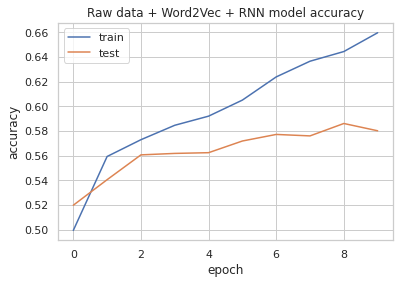

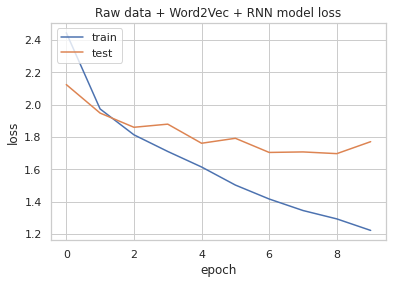

In [ ]:
RNNModelRawData.plotModelAccuracy(RNNModelRawData_history, 'Raw data + Word2Vec + RNN')

In [ ]:
results=captureData(results,RNNModelRawData_history,'RNN model_Word2Vec_rawdata','RNN+Word2Vec Embedding on raw data','6',0)
pred_results= capturePrediction(pred_results,'RNN model_Word2Vec_rawdata','RNN+Word2Vec Embedding on raw data','6',RNNModelRawData_accuracy,RNNModelRawData_f1,0)

In [ ]:
pred_results

,model,Pred_Accuracy,Pred_F1,descriptions
1,LSTM model_GloVe_rawdata,0.606868,0.557877,LSTM+GloVe Embedding on raw data
2,GRU model_GloVe_rawdata,0.612789,0.560837,GRU+GloVe Embedding on raw data
3,RNN model_GloVe_rawdata,0.563647,0.514013,RNN+GloVe Embedding on raw data
4,LSTM model_Word2Vec_rawdata,0.598579,0.538804,LSTM+Word2Vec Embedding on raw data
5,GRU model_Word2Vec_rawdata,0.588514,0.536617,GRU+Word2Vec Embedding on raw data
6,RNN model_Word2Vec_rawdata,0.580225,0.506847,RNN+Word2Vec Embedding on raw data


#### Advanced Model Results for Raw Data:

LSTM and GRU -  Glove model has performed better considering the Accuracy and F1 scores.

Future Scope:

The models are to built after resampling the target variable. Combination of advanced NLP models with attention and transfer learning approaches are to be built. The models are analysed based on accuracy and f1-score.

## Resampling Data

Since the data for Group-0 is more compared to other groups, resampling is done in two ways.
1. Resampling the other group - (other than group-0) and trying two model approach.
2. Resampling the whole dataset to simultaneously apply upsampling for other group and downsampling for group 0

In [ ]:
df_cleaned['Assignment group'].value_counts()

0     3975
46     661
17     289
4      257
47     252
12     241
11     215
23     200
41     182
5      145
2      140
38     129
6      118
18     116
26     107
31     100
22      96
48      92
10      88
8       85
9       81
45      68
27      62
25      59
19      56
32      45
21      44
33      40
7       39
34      37
13      36
36      35
1       31
15      31
3       30
14      29
37      27
43      25
16      25
42      20
30      19
20      18
29      16
24      16
35      15
28      15
39      14
40      11
44      11
Name: Assignment group, dtype: int64

There is high imbalance in the target dataset

In [ ]:
df_cleaned_others = df_cleaned[df_cleaned['Assignment group'] != 0]

In [ ]:
df_cleaned_GRP0 = df_cleaned.copy()
df_cleaned_GRP0['Assignment group']=df_cleaned_GRP0['Assignment group'].apply(lambda x : 'other' if x != 0  else x)

In [ ]:
maxValue_others = df_cleaned_others['Assignment group'].value_counts().max()
maxValue_others

661

In [ ]:
from sklearn.utils import resample
df_cleaned_others_resampled = df_cleaned_others[0:0]
for grp in df_cleaned_others['Assignment group'].unique():
    itTicketGrpDF = df_cleaned_others[df_cleaned_others['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxValue_others/2), random_state=55)
    df_cleaned_others_resampled = df_cleaned_others_resampled.append(resampled)

otherGrps_resampled = pd.concat([df_cleaned_GRP0,df_cleaned_others_resampled])
otherGrps_resampled.reset_index(inplace=True)

Created one dataframe with other than Group-0 target resampled to the mid value 331

In [ ]:
df_cleaned_resampled = df_cleaned[0:0]
for grp in df_cleaned['Assignment group'].unique():
    itTicketGrpDF = df_cleaned[df_cleaned['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxValue_others), random_state=55)
    df_cleaned_resampled = df_cleaned_resampled.append(resampled)

Resampled the complete data to max length of other group by downsampling the Group-0 and upsampling rest groups.

In [ ]:
def plot_groups(df):
  descending_order = df['Assignment group'].value_counts().sort_values(ascending=False).index
  plt.subplots(figsize=(22,5))
  ax=sns.countplot(x='Assignment group', data=df)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
  plt.tight_layout()
  plt.show()

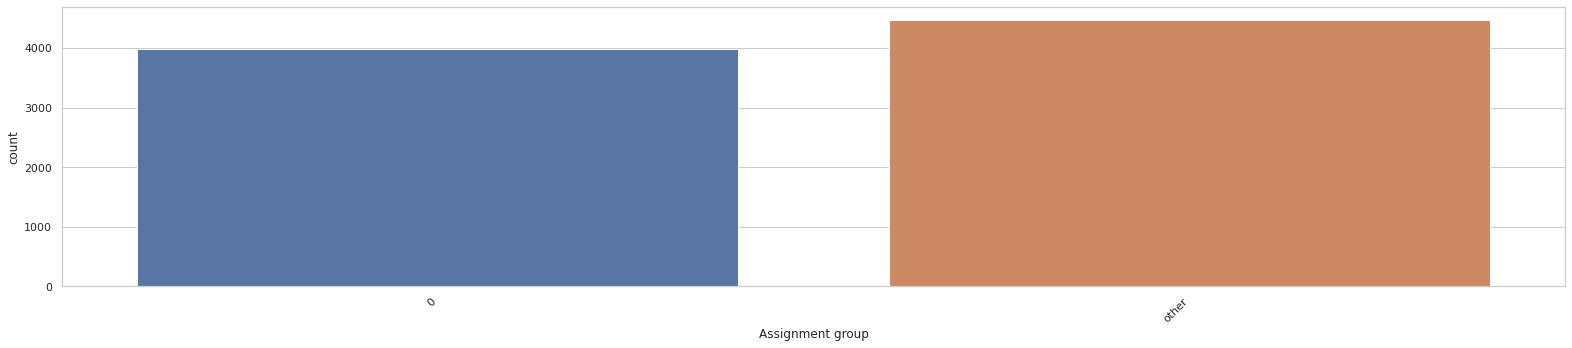

In [ ]:
plot_groups(df_cleaned_GRP0)

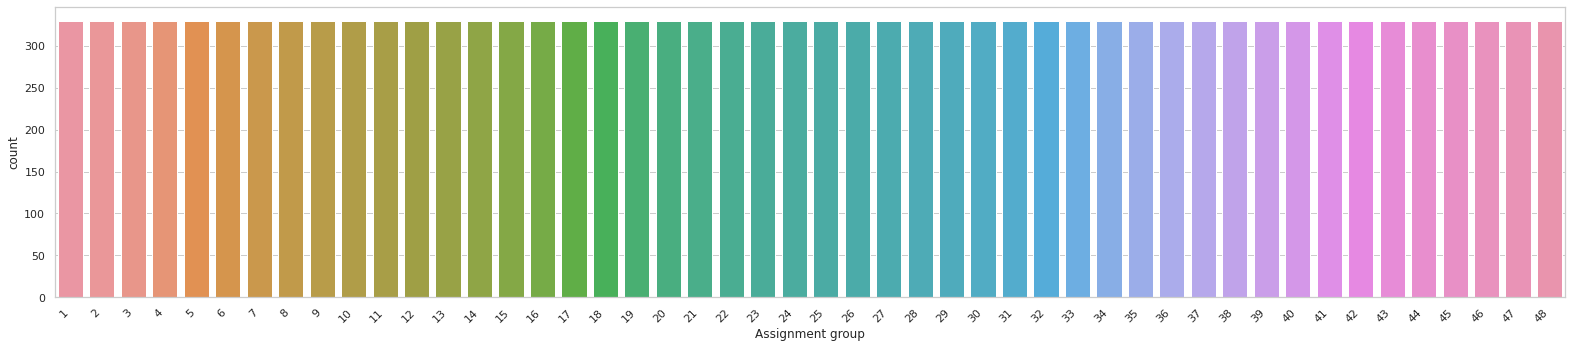

In [ ]:
plot_groups(df_cleaned_others_resampled)

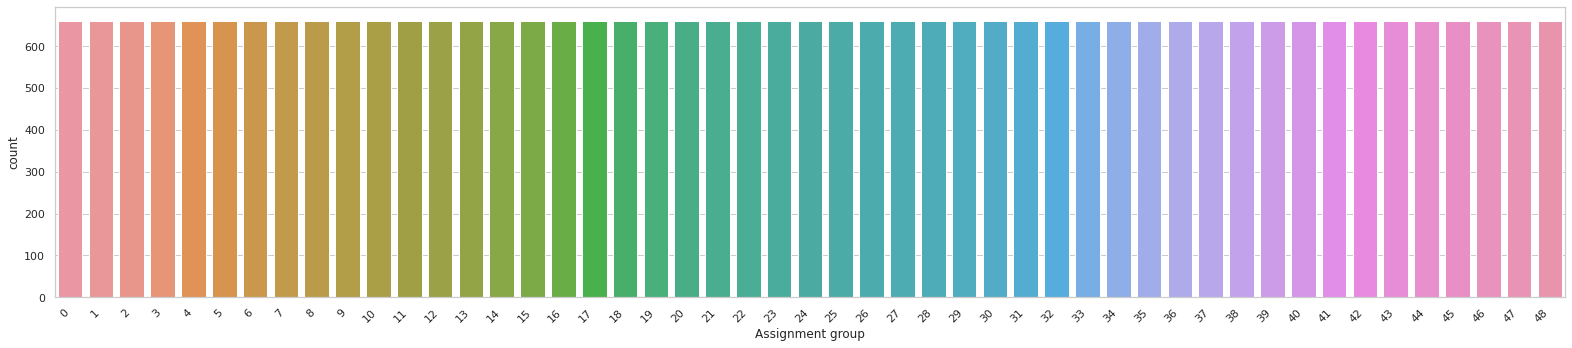

In [ ]:
plot_groups(df_cleaned_resampled)

**Label encoding and getting groups for resampled data**

In [ ]:
otherGrps_resampled['Assignment group'] = otherGrps_resampled['Assignment group'].astype('str')

In [ ]:
otherGrps_resampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(otherGrps_resampled['Assignment group'])
df_cleaned_resampled['Assignment group'] , grp_mapping_all_resampled= labelencoder(df_cleaned_resampled['Assignment group'])

## **Two part model:**
1. **Model 1 - Identifies if the target is 'Group 0' or 'Others'**
2. **Model 2 - Identifies the actual target from other groups**

LSTM + W2V for two model approach

In [ ]:
class two_model_approach:

  model_1 = Model()
  model_2 = Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return tokenizer,dataframe

  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def runFirstModel(self,dataframe,epochs):

    grp0_df = dataframe.copy()
    # redefine the target as 0 for Group_0 and 1 for other groups
    grp0_df['Assignment group']=dataframe['Assignment group'].apply(lambda x : 1 if x != 0  else x) 
    tokenizer,X = self.wordTokenizer(grp0_df['cleaned_description'])
    y = np.asarray(grp0_df['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)

    model_history,self.model_1 = self.modelRunner(X_train,y_train,X_Val,y_Val,epochs)
    return model_history,self.model_1

  def runSecondModel(self, dataframe,epochs):

    grpOthers_df = dataframe.copy()
    # removing the group 0 from target groups
    grpOthers_df = grpOthers_df[grpOthers_df['Assignment group'] != 0]
    # reducing the length to remove encoded 'Others' from end
    grpOthers_df['Assignment group']=grpOthers_df['Assignment group'] - 1
    tokenizer,X = self.wordTokenizer(grpOthers_df['cleaned_description'])
    y = np.asarray(grpOthers_df['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
      
    model_history,self.model_2 = self.modelRunner(X_train,y_train,X_Val,y_Val,epochs)
    return model_history,self.model_2

  def modelRunner(self, X,Y,X_Val,Y_Val,epochs):
        
        input_layer = Input(shape=(maxlen,),dtype=tf.int64)
        embed = Embedding(input_dim = numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)
        lstm=Bidirectional(LSTM(128))(embed)
        drop=Dropout(0.3)(lstm)
        dense =Dense(100,activation='relu')(drop)
        out=Dense(len((pd.Series(Y)).unique()),activation='softmax')(dense)   
        batch_size = 100
        
        model = Model(input_layer,out)
        model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
        
        checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
        reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
        
        model_history = model.fit(X,Y,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,Y_Val))
        return model_history,model

  def predict(self, X_test):
        predBinary = self.model_1.predict(X_test)
        predBinary = [1 if j>i else 0 for i,j in predBinary]

        new_X_test = pd.DataFrame(X_test)
        new_X_test['grp']=predBinary
        sec_input = new_X_test[new_X_test['grp']!=0]
        sec_input.drop(['grp'],inplace=True, axis=1)
        new_X_test=new_X_test[new_X_test['grp']==0]

        predOther = self.model_2.predict(sec_input)
        predOther = [i.argmax() for i in predOther]
        predOther= [i+1 for i in predOther]
        sec_input['grp']=predOther

        pred_df = pd.concat([new_X_test,sec_input])
        pred_df.sort_index(axis=0,inplace=True)

        return np.array(pred_df['grp'])

  def prediction(self,model):
      
     pred = model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     print("Accuracy of the model :",accuracy)
     f1_score = metrics.f1_score(self.y_test, pred,average='weighted')     
     print("F1 score of the model :",f1_score)
     return accuracy,f1_score

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()


In [ ]:
model = two_model_approach()

In [ ]:
model1_history,model1 = model.runFirstModel(otherGrps_resampled,10)

Number of Samples: 24283
Number of Labels:  24283
Number of train Samples: 19426
Number of val Samples: 4857
Epoch 1/10
194/195 [============================>.] - ETA: 0s - loss: 0.3140 - accuracy: 0.8743
Epoch 1: val_accuracy improved from -inf to 0.89417, saving model to model-001-0.894173.h5
195/195 [==============================] - 13s 48ms/step - loss: 0.3139 - accuracy: 0.8743 - val_loss: 0.2778 - val_accuracy: 0.8942 - lr: 0.0010
Epoch 2/10
195/195 [==============================] - ETA: 0s - loss: 0.1932 - accuracy: 0.9254
Epoch 2: val_accuracy improved from 0.89417 to 0.93350, saving model to model-002-0.933498.h5
195/195 [==============================] - 8s 43ms/step - loss: 0.1932 - accuracy: 0.9254 - val_loss: 0.1762 - val_accuracy: 0.9335 - lr: 0.0010
Epoch 3/10
195/195 [==============================] - ETA: 0s - loss: 0.1121 - accuracy: 0.9560
Epoch 3: val_accuracy improved from 0.93350 to 0.93885, saving model to model-003-0.938851.h5
195/195 [========================

In [ ]:
model2_history,model2 = model.runSecondModel(otherGrps_resampled,15)

Number of Samples: 20308
Number of Labels:  20308
Number of train Samples: 16246
Number of val Samples: 4062
Epoch 1/15
163/163 [==============================] - ETA: 0s - loss: 3.0816 - accuracy: 0.2279
Epoch 1: val_accuracy improved from -inf to 0.25849, saving model to model-001-0.258493.h5
163/163 [==============================] - 11s 48ms/step - loss: 3.0816 - accuracy: 0.2279 - val_loss: 2.6803 - val_accuracy: 0.2585 - lr: 0.0010
Epoch 2/15
163/163 [==============================] - ETA: 0s - loss: 2.3362 - accuracy: 0.3129
Epoch 2: val_accuracy improved from 0.25849 to 0.40153, saving model to model-002-0.401526.h5
163/163 [==============================] - 7s 42ms/step - loss: 2.3362 - accuracy: 0.3129 - val_loss: 1.9829 - val_accuracy: 0.4015 - lr: 0.0010
Epoch 3/15
163/163 [==============================] - ETA: 0s - loss: 1.7520 - accuracy: 0.4502
Epoch 3: val_accuracy improved from 0.40153 to 0.54505, saving model to model-003-0.545052.h5
163/163 [========================

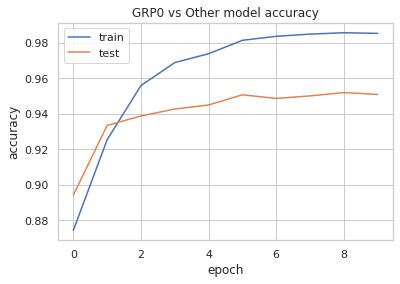

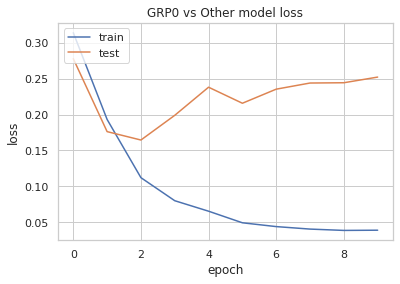

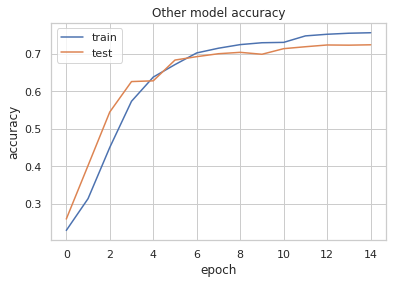

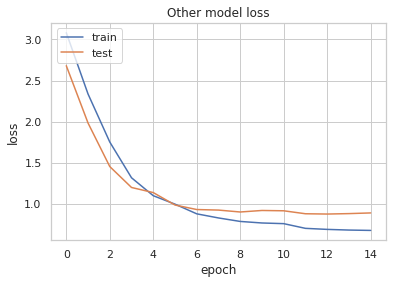

In [ ]:
model.plotModelAccuracy(model1_history, 'GRP0 vs Other')
model.plotModelAccuracy(model2_history, 'Other')

In [ ]:
two_part_model_accuracy , two_part_model_f1 = model.prediction(model)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Accuracy of the model : 0.012801575578532743
Accuracy of the model : 0.012801575578532743
F1 score of the model : 0.0003236178561418098


In [ ]:
resampled_results = pd.DataFrame()
resampled_pred_results = pd.DataFrame()

In [ ]:
resampled_results=captureData(resampled_results,model1_history,'Two part model-LSTM_W2V_grp0','LSTM+Word2Vec Embedding on grp0_data','1',0)
resampled_results=captureData(resampled_results,model2_history,'Two part model-LSTM_W2V_Others','LSTM+Word2Vec Embedding on Rest of groups','1',0)
resampled_pred_results= capturePrediction(resampled_pred_results,'Two part model-LSTM_W2V','Two part model + word2vec + LSTM bidirectional','1',two_part_model_accuracy , two_part_model_f1,0)

In [ ]:
resampled_pred_results

,model,Pred_Accuracy,Pred_F1,descriptions
1,Two part model-LSTM_W2V,0.012802,0.000324,Two part model + word2vec + LSTM bidirectional


LSTM+Glove Embedding for Two model approach

In [ ]:
class two_model_approach:

  model_1 = Model()
  model_2 = Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_glove.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return tokenizer,dataframe

  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def runFirstModel(self,dataframe,epochs):

    grp0_df = dataframe.copy()
    # redefine the target as 0 for Group_0 and 1 for other groups
    grp0_df['Assignment group']=dataframe['Assignment group'].apply(lambda x : 1 if x != 0  else x) 
    tokenizer,X = self.wordTokenizer(grp0_df['cleaned_description'])
    y = np.asarray(grp0_df['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)

    model_history,self.model_1 = self.modelRunner(X_train,y_train,X_Val,y_Val,epochs)
    return model_history,self.model_1

  def runSecondModel(self, dataframe,epochs):

    grpOthers_df = dataframe.copy()
    # removing the group 0 from target groups
    grpOthers_df = grpOthers_df[grpOthers_df['Assignment group'] != 0]
    # reducing the length to remove encoded 'Others' from end
    grpOthers_df['Assignment group']=grpOthers_df['Assignment group'] - 1
    tokenizer,X = self.wordTokenizer(grpOthers_df['cleaned_description'])
    y = np.asarray(grpOthers_df['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
      
    model_history,self.model_2 = self.modelRunner(X_train,y_train,X_Val,y_Val,epochs)
    return model_history,self.model_2

  def modelRunner(self, X,Y,X_Val,Y_Val,epochs):
        
        input_layer = Input(shape=(maxlen,),dtype=tf.int64)
        embed = Embedding(input_dim = numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)
        lstm=Bidirectional(LSTM(128))(embed)
        drop=Dropout(0.3)(lstm)
        dense =Dense(100,activation='relu')(drop)
        out=Dense(len((pd.Series(Y)).unique()),activation='softmax')(dense)   
        batch_size = 100
        
        model = Model(input_layer,out)
        model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
        
        checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
        reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
        
        model_history = model.fit(X,Y,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,Y_Val))
        return model_history,model

  def predict(self, X_test):
        predBinary = self.model_1.predict(X_test)
        predBinary = [1 if j>i else 0 for i,j in predBinary]

        new_X_test = pd.DataFrame(X_test)
        new_X_test['grp']=predBinary
        sec_input = new_X_test[new_X_test['grp']!=0]
        sec_input.drop(['grp'],inplace=True, axis=1)
        new_X_test=new_X_test[new_X_test['grp']==0]

        predOther = self.model_2.predict(sec_input)
        predOther = [i.argmax() for i in predOther]
        predOther= [i+1 for i in predOther]
        sec_input['grp']=predOther

        pred_df = pd.concat([new_X_test,sec_input])
        pred_df.sort_index(axis=0,inplace=True)

        return np.array(pred_df['grp'])

  def prediction(self,model):
      
     pred = model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     print("Accuracy of the model :",accuracy)
     f1_score = metrics.f1_score(self.y_test, pred,average='weighted')     
     print("F1 score of the model :",f1_score)
     return accuracy,f1_score

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()


In [ ]:
model_2 = two_model_approach()

In [ ]:
model1_history,model1 = model_2.runFirstModel(otherGrps_resampled,10)

Number of Samples: 24283
Number of Labels:  24283
Number of train Samples: 19426
Number of val Samples: 4857
Epoch 1/10
195/195 [==============================] - ETA: 0s - loss: 0.2999 - accuracy: 0.8808
Epoch 1: val_accuracy improved from -inf to 0.91023, saving model to model-001-0.910233.h5
195/195 [==============================] - 12s 47ms/step - loss: 0.2999 - accuracy: 0.8808 - val_loss: 0.2181 - val_accuracy: 0.9102 - lr: 0.0010
Epoch 2/10
195/195 [==============================] - ETA: 0s - loss: 0.1712 - accuracy: 0.9329
Epoch 2: val_accuracy improved from 0.91023 to 0.93473, saving model to model-002-0.934733.h5
195/195 [==============================] - 8s 43ms/step - loss: 0.1712 - accuracy: 0.9329 - val_loss: 0.1778 - val_accuracy: 0.9347 - lr: 0.0010
Epoch 3/10
195/195 [==============================] - ETA: 0s - loss: 0.1158 - accuracy: 0.9558
Epoch 3: val_accuracy improved from 0.93473 to 0.94729, saving model to model-003-0.947293.h5
195/195 [========================

In [ ]:
model2_history,model2 = model_2.runSecondModel(otherGrps_resampled,15)

Number of Samples: 20308
Number of Labels:  20308
Number of train Samples: 16246
Number of val Samples: 4062
Epoch 1/15
162/163 [============================>.] - ETA: 0s - loss: 3.0345 - accuracy: 0.2500
Epoch 1: val_accuracy improved from -inf to 0.36288, saving model to model-001-0.362875.h5
163/163 [==============================] - 11s 47ms/step - loss: 3.0319 - accuracy: 0.2504 - val_loss: 2.2546 - val_accuracy: 0.3629 - lr: 0.0010
Epoch 2/15
163/163 [==============================] - ETA: 0s - loss: 1.9209 - accuracy: 0.4288
Epoch 2: val_accuracy improved from 0.36288 to 0.52363, saving model to model-002-0.523634.h5
163/163 [==============================] - 7s 42ms/step - loss: 1.9209 - accuracy: 0.4288 - val_loss: 1.5590 - val_accuracy: 0.5236 - lr: 0.0010
Epoch 3/15
163/163 [==============================] - ETA: 0s - loss: 1.4051 - accuracy: 0.5600
Epoch 3: val_accuracy improved from 0.52363 to 0.62211, saving model to model-003-0.622107.h5
163/163 [========================

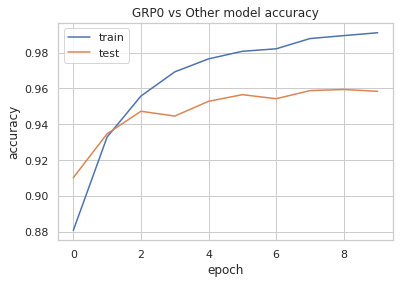

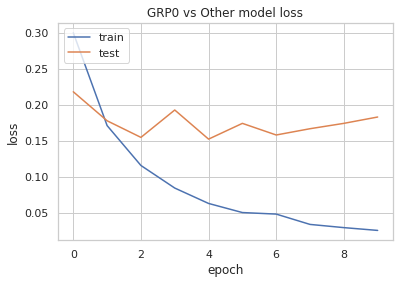

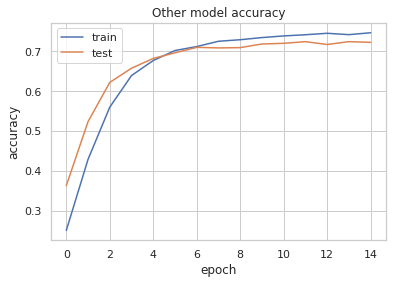

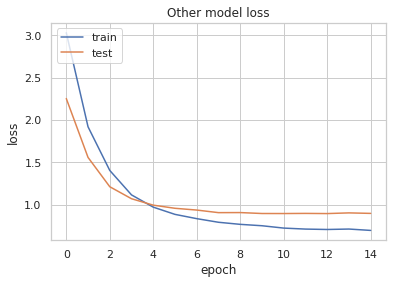

In [ ]:
model_2.plotModelAccuracy(model1_history, 'GRP0 vs Other')
model_2.plotModelAccuracy(model2_history, 'Other')

In [ ]:
two_part_model_accuracy , two_part_model_f1 = model_2.prediction(model_2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Accuracy of the model : 0.012801575578532743
Accuracy of the model : 0.012801575578532743
F1 score of the model : 0.0003236178561418098


In [ ]:
resampled_results=captureData(resampled_results,model1_history,'Two part model-LSTM_glove_grp0','LSTM+glove Embedding on grp0_data','2',0)
resampled_results=captureData(resampled_results,model2_history,'Two part model-LSTM_glove_Others','LSTM+glove Embedding on Rest of groups','2',0)
resampled_pred_results= capturePrediction(resampled_pred_results,'Two part model-LSTM_glove','Two part model + glove + LSTM bidirectional','2',two_part_model_accuracy , two_part_model_f1,0)

In [ ]:
resampled_pred_results

,model,Pred_Accuracy,Pred_F1,descriptions
1,Two part model-LSTM_W2V,0.012802,0.000324,Two part model + word2vec + LSTM bidirectional
2,Two part model-LSTM_glove,0.012802,0.000324,Two part model + glove + LSTM bidirectional


**Since two part model for both type of embedding is not giving good result, not experimenting with other model+embedding combination for this approach.**

## Resampled whole dataset - one model approach

**LSTM+Glove+Resampled data**

In [ ]:
lstmModel_resampled = LstmGloveModel()
lstmModel_resampled_history, model = lstmModel_resampled.train(df_cleaned_resampled,100,epochs)
lstm_resampled_accuracy , lstm_resampled_F1 = lstmModel_resampled.prediction()

Number of Samples: 32389
Number of Labels:  32389
Number of train Samples: 25911
Number of val Samples: 6478
Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 300)]             0         
                                                                 
 embedding_10 (Embedding)    (None, 300, 100)          900100    
                                                                 
 bidirectional_8 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               25700     
                                                                 
 dense_21 (Dens

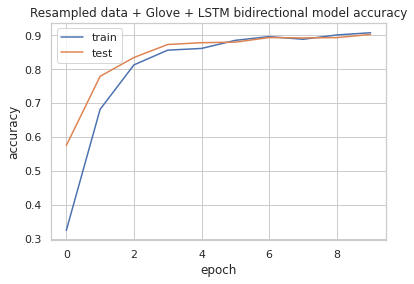

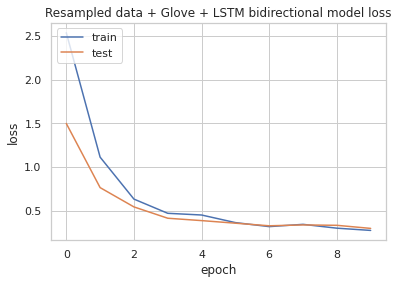

In [ ]:
lstmModel_resampled.plotModelAccuracy(lstmModel_resampled_history, 'Resampled data + Glove + LSTM bidirectional')

In [ ]:
resampled_results=captureData(resampled_results,lstmModel_resampled_history,'Resampled data + Glove + LSTM bidirectional','Resampled data + Glove + LSTM bidirectional','3',0)
resampled_pred_results= capturePrediction(resampled_pred_results,'Resampled data + Glove + LSTM bidirectional','Resampled data + Glove + LSTM bidirectional','3',lstm_resampled_accuracy,lstm_resampled_F1,0)

In [ ]:
resampled_pred_results

,model,Pred_Accuracy,Pred_F1,descriptions
1,Two part model-LSTM_W2V,0.012802,0.000324,Two part model + word2vec + LSTM bidirectional
2,Two part model-LSTM_glove,0.012802,0.000324,Two part model + glove + LSTM bidirectional
3,Resampled data + Glove + LSTM bidirectional,0.902285,0.908345,Resampled data + Glove + LSTM bidirectional


**GRU+Glove+Resampled data**

In [ ]:
gruModel_resampled = GruGloveModel()
gruModel_resampled_history, model = gruModel_resampled.train(df_cleaned_resampled,100,epochs)
gruModel_resampled_accuracy, gruModel_resampled_f1 = gruModel_resampled.prediction()

Number of Samples: 32389
Number of Labels:  32389
Number of train Samples: 25911
Number of val Samples: 6478
Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 300)]             0         
                                                                 
 embedding_11 (Embedding)    (None, 300, 100)          900100    
                                                                 
 gru_2 (GRU)                 (None, 128)               88320     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               12900     
                                                                 
 dense_23 (Dense)            (None, 49)                4949      
               

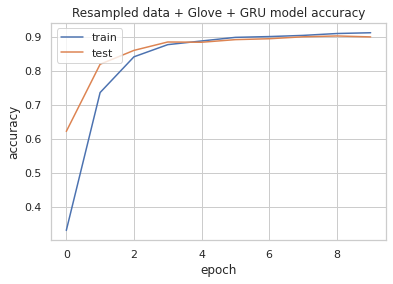

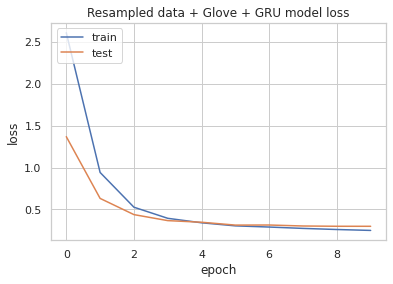

In [ ]:
gruModel_resampled.plotModelAccuracy(gruModel_resampled_history, 'Resampled data + Glove + GRU')

In [ ]:
resampled_results=captureData(resampled_results,gruModel_resampled_history,'Resampled data + Glove + GRU','Resampled data + Glove +GRU','4',0)
resampled_pred_results= capturePrediction(resampled_pred_results,'Resampled data + Glove + GRU','Resampled data + Glove + GRU','4',gruModel_resampled_accuracy,gruModel_resampled_f1,0)

In [ ]:
resampled_pred_results

,model,Pred_Accuracy,Pred_F1,descriptions
1,Two part model-LSTM_W2V,0.012802,0.000324,Two part model + word2vec + LSTM bidirectional
2,Two part model-LSTM_glove,0.012802,0.000324,Two part model + glove + LSTM bidirectional
3,Resampled data + Glove + LSTM bidirectional,0.902285,0.908345,Resampled data + Glove + LSTM bidirectional
4,Resampled data + Glove + GRU,0.900587,0.905699,Resampled data + Glove + GRU


## Final summary:
1. Resampling of data performs better than Raw data
2. Two model approach is performing worse than Raw data models
3. Accuracy and F1 score for Resampled data+Glove+GRU combination is more than 90% hence it is the best model according to the analysis
